In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
import numpy as np
from matplotlib import ticker
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

plt.rcParams.update({'font.size': 20, 'font.family': 'serif'})
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.linewidth'] = 2

def load_data(path_to_file):

    """ This function load the data for the plot.
    'path_to_file' is set such that it starts from 'results/data' """
    data = np.load(f'results/data/{path_to_file}')
    return data

# Mean gap ratio

In [2]:
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx

In [3]:
def plot_gap_ratio(L, save=True, title=False):

    """
    Function to plot the gap ratio as a function of h and W.
    Parameters:
    gap (ndarray): gap ratio values
    L (int): number of qubits
    save (bool): whether to save the plot
    """
    
    path = f'gap_ratio_L_{L}.npy'

    data = load_data(path_to_file=path)

    x = data[0]
    y = data[1]
    X, Y = np.meshgrid(x, y)

    gap = data[2:]
    Z = gap.T

    plt.rcParams.update({'font.size': 20, 'font.family': 'serif'})
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.linewidth'] = 2
    plt.figure(figsize=(12, 8))

    cs = plt.contourf(X, Y, Z, cmap='managua', levels=10)


    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('h')
    plt.ylabel('W')
    cbar = plt.colorbar(cs, label=r'$\langle r_n \rangle$')

    if title:
        plt.title(f'Gap Ratio for L={L}')

    if save:
        plt.savefig(f'results/plots/gap_ratio_L_{L}.png', dpi=600)

    plt.show()
                
    return

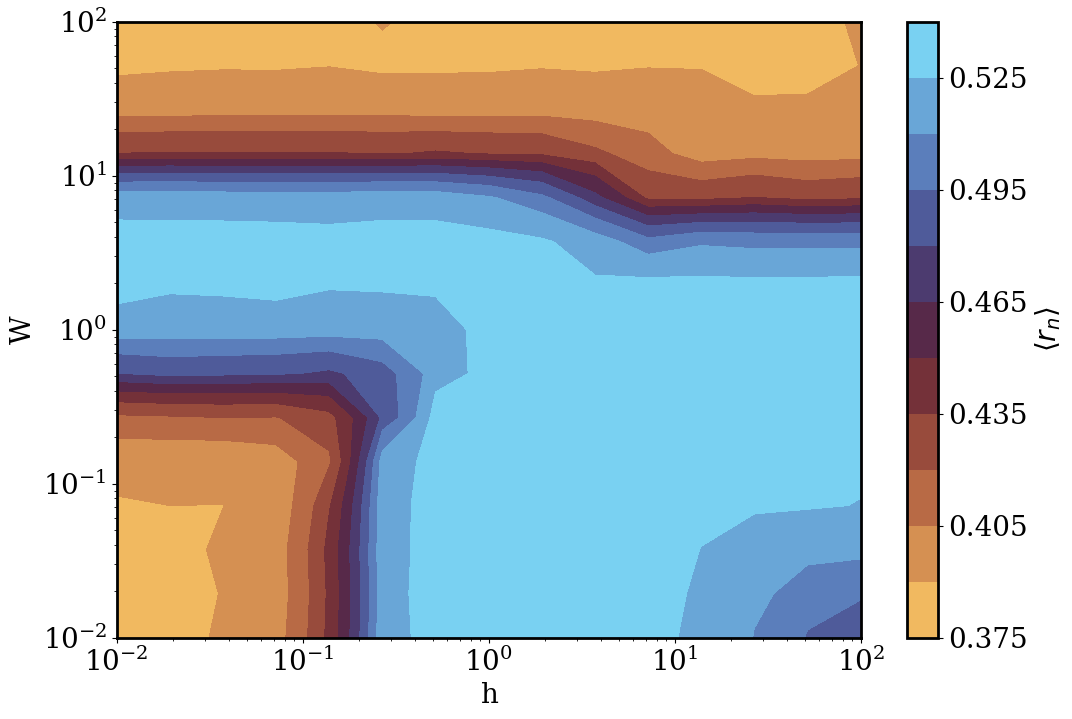

In [4]:
plot_gap_ratio(L=12, save=True)

## r distribution

In [5]:
def GOE(x):
    return 27/4 * (x + x**2) / (1 +x +x**2)**(5/2)

In [6]:
def plot_r_distribution(L, save=True, title=False, h_val=[0.01,100], W_val=[0.01, 0.01]):

    fig, ax = plt.subplots(figsize=(12,5), ncols=2, nrows=1, sharey='all')
    i = 0
    colors = ['darkorange', 'dodgerblue']
    x = np.linspace(0,1, endpoint=True, num=100)

    for h, W in zip(h_val, W_val):
        path = f'all_rn_h{h}_W{W}.npz'

        data = load_data(path_to_file=path)
        rn = data['rn']

        ax[i].hist(rn, density=True, alpha=0.5, bins=100, label=f'h = {h}, W = {W}', color=colors[i])
        ax[i].vlines(np.mean(rn), ymin=0, ymax = 1.5, linestyle='--', label=fr'$r$ = {np.mean(rn):.3f}', color= colors[i])
        ax[i].legend(frameon=False)
        ax[i].set_xlabel(r'$r_n$')
        ax[i].xaxis.set_minor_locator(ticker.LinearLocator(numticks=3))
        i+=1

    # if title:
    #     plt.title(f'Gap Ratio for L={L}')

    if save:
        plt.savefig(f'results/plots/gap_ratio_pdf_L_{L}.png', dpi=600)
    plt.show()
    plt.tight_layout()
                
    return

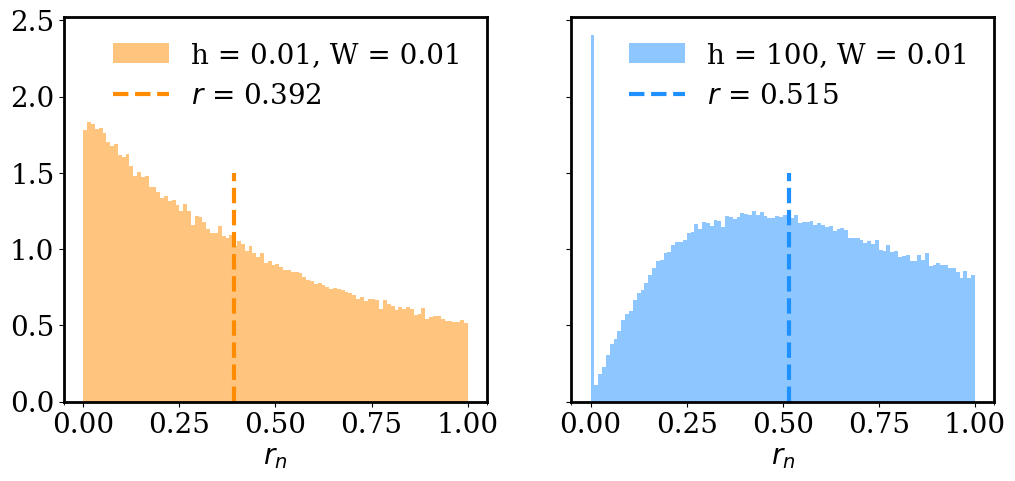

<Figure size 640x480 with 0 Axes>

In [7]:
plot_r_distribution(L=9, save=False, title=False, h_val=[0.01,100], W_val=[0.01, 0.01])

In [8]:
def GOE(x):
    return 27/4 * (x + x**2) / (1 +x +x**2)**(5/2)

def plot_combined_r_and_gap(L, save=True, title=False, h_val=[0.01, 100], W_val=[0.01, 0.01]):
    # Setup figure with GridSpec
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

    # Histogram axes (left column)
    ax_hist_1 = fig.add_subplot(gs[0, 1])
    ax_hist_2 = fig.add_subplot(gs[1, 1], sharey=ax_hist_1, sharex=ax_hist_1)

    # Contour plot axes (right column, spans both rows)
    ax_contour = fig.add_subplot(gs[:, 0])

    x = np.linspace(0,1, endpoint=True, num=100)

    # Plot histograms
    colors = ['darkorange', 'dodgerblue']
    for i, (h, W) in enumerate(zip(h_val, W_val)):
        path = f'all_rn_h{h}_W{W}.npz'
        data = load_data(path_to_file=path)
        rn = data['rn']

        ax = ax_hist_1 if i == 0 else ax_hist_2
        mean_rn = np.mean(rn)
        error_rn = np.std(rn)/np.sqrt(1000)
        ax.hist(rn, density=True, alpha=0.5, bins=100, label=f'h = {h}, W = {W}', color=colors[i])
        ax.vlines(mean_rn, ymin=0, ymax=1.5, linestyle='--', label=fr'$r = {mean_rn:.3f} \pm {error_rn:.3f}$', color=colors[i])
        ax.set_xlabel(r'$r_n$')
        ax.legend(frameon=False, fontsize=13)
        ax.xaxis.set_minor_locator(ticker.LinearLocator(numticks=3))

    ax_hist_1.plot(x, 2/(1+x)**2, color = colors[0])
    ax_hist_2.plot(x, GOE(x), color = colors[1])
    # Plot contour
    path = f'gap_ratio_L_{L}.npy'
    data = load_data(path_to_file=path)

    x = data[0]
    y = data[1]
    X, Y = np.meshgrid(x, y)
    gap = data[2:]
    Z = gap.T

    cs = ax_contour.contourf(X, Y, Z, cmap='managua', levels=10)
    # idx1 = find_nearest(cs.levels, 0.4)
    # idx2 = find_nearest(cs.levels, 0.51)
    # levels = np.array([cs.levels[idx1], cs.levels[idx2]])
    # cs1 = ax_contour.contour(cs, levels=levels, colors='r')
    # ax_contour.clabel(cs1, fmt='%2.2f', colors='w', fontsize=14)

    ax_contour.set_xscale('log')
    ax_contour.set_yscale('log')
    ax_contour.set_xlabel('h')
    ax_contour.set_ylabel('W')

    ax_contour.text(0.02, 0.02, 'I', size=32, fontstyle = 'italic', weight='semibold')
    ax_contour.text(10, 0.02, 'III', size=32, fontstyle = 'italic', weight='semibold')
    ax_contour.text(0.02, 1.5, 'II', size=32, fontstyle = 'italic', weight='semibold')
    ax_contour.text(10, 40, 'IV', size=32, fontstyle = 'italic', weight='semibold')


    cbar = fig.colorbar(cs, ax=ax_contour, label=r'$\langle r_n \rangle$')
    # cbar.add_lines(cs1)

    if title:
        fig.suptitle(f'Gap Ratio and Distributions for L={L}', fontsize=22)

    fig.tight_layout(rect=[0, 0, 1, 0.96])
    
    if save:
        plt.savefig(f'results/plots/combined_gap_ratio_L_{L}.png', dpi=600)

    plt.show()


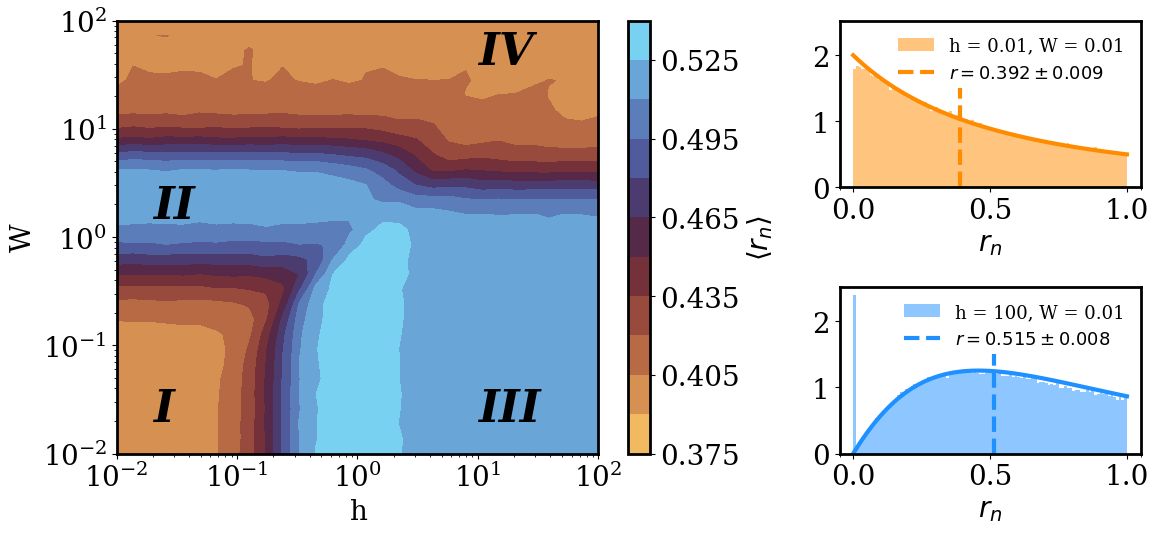

In [9]:
plot_combined_r_and_gap(L=9, save=True, title=False, h_val=[0.01, 100], W_val=[0.01, 0.01])

# Observable Dynamics

In [10]:
def sigma_z_evolution(L, Js, h, W, Vmp, task_name, dt=10, L_max=1, inp_sig=True, plot_save=True):

    # Import Data
    path = f'{task_name}/QRC/L{L}_Js{Js}_h{h}_W{W}_dt{dt}_V{Vmp}_D1_Nrep1/Iter_0.npz'
    data = load_data(path)

    inp = data['inp']
    obs = data['obs']

    t_length = obs.shape[0]

    n_obs = 3 * L # 3 because of 3 axis 'z', 'x', 'y' (It is important that the data must contain the three axis)
    loc_obs_ordered = np.full((n_obs, t_length * Vmp), fill_value=np.nan)

    for n in range(3):
        for i in range(t_length):
            for d in range(Vmp):
                for q in range(L):
                    target_index = i * Vmp + (d)
                    source_index = L * (n * Vmp + d) + q 
                    loc_obs_ordered[n*L + q, target_index] = obs[i, source_index]

    t_mp = np.arange(t_length, step=dt/Vmp)
    t_inj = np.arange(t_length, step=dt)

    idx_min = 310
    idx_max = 320

    fig, ax = plt.subplots(figsize=(12,4))
    if inp_sig:
        ax.step(t_inj[idx_min:idx_max+1], inp[idx_min:idx_max+1], lw=2, linestyle='--', where='post') # Input signal

    for i in range(L_max):
        ax.plot(t_mp[idx_min*Vmp:idx_max*Vmp+1], (loc_obs_ordered[i,idx_min*Vmp:idx_max*Vmp+1]+1)/2) # Sigma z dynamics (reescaled (1+x)/2)

    ax.set_xlabel(r'$J_st$')
    ax.set_ylabel(r'$(\langle \sigma_1^z \rangle + 1)/2$')
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

    if plot_save:
        plt.savefig(f'results/plots/sigma_z_evolution_L{L}_J{Js}_h{h}_W{W}.png', dpi=600)

    plt.show()

    return

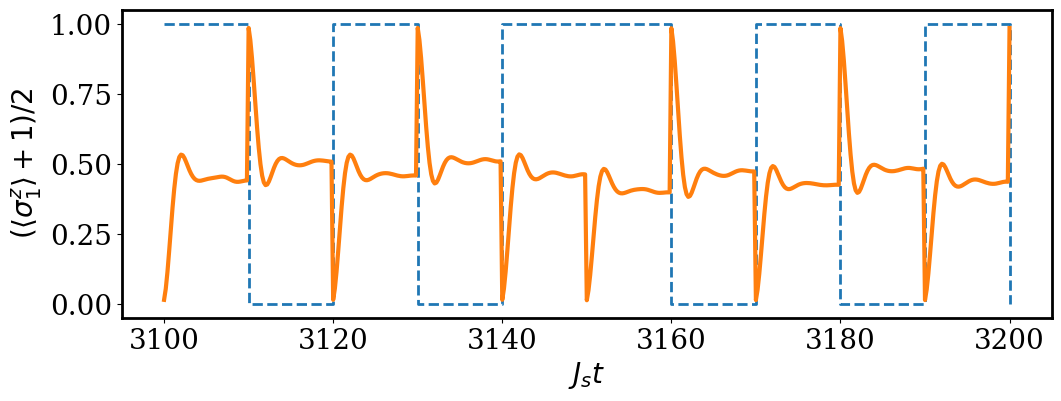

In [11]:
sigma_z_evolution(L=9, Js=1, h=100, W=0.01, Vmp=50, task_name='PC', plot_save=True)

## Dynamics in Phase Transition

In [12]:
def phase_transision_sigmaz_dynamics(L, h_list, W_list, Vmp=50, task_name='PC', dt=10, Js=1, plot_save=True):

    # Setup figure with GridSpec
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1, 1], height_ratios=[1, 1], figure=fig)

    # Histogram axes (left column)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1], sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(gs[1, 0], sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(gs[1, 1], sharey=ax1, sharex=ax1)

    axes = [ax1,ax2,ax3,ax4]
    text = ['I', 'II', 'IV', 'III']
    for h, W, ax, t in zip(h_list, W_list, axes, text):

        # Import Data
        path = f'{task_name}/QRC/L{L}_Js{Js}_h{h}_W{W}_dt{dt}_V{Vmp}_D1_Nrep1/Iter_0.npz'
        data = load_data(path)

        obs = data['obs']

        t_length = obs.shape[0]

        n_obs = 3 * L # 3 because of 3 axis 'z', 'x', 'y' (It is important that the data must contain the three axis)
        loc_obs_ordered = np.full((n_obs, t_length * Vmp), fill_value=np.nan)

        for n in range(3):
            for i in range(t_length):
                for d in range(Vmp):
                    for q in range(L):
                        target_index = i * Vmp + (d)
                        source_index = L * (n * Vmp + d) + q 
                        loc_obs_ordered[n*L + q, target_index] = obs[i, source_index]

        t_mp = np.arange(t_length, step=dt/Vmp)

        idx_min = 44
        idx_max = 51

        for i in range(L):
            ax.plot(t_mp[idx_min*Vmp:idx_max*Vmp], loc_obs_ordered[i,idx_min*Vmp:idx_max*Vmp]) # Sigma z dynamics (reescaled (1+x)/2)

        ax.text(0.82, 0.8, t, size=32, fontstyle = 'italic', weight='semibold', transform=ax.transAxes)

    for ax in [ax1, ax3]:
        ax.set_ylabel(r'$\langle \sigma_i^z \rangle$')
    for ax in [ax2, ax4]:
        ax.tick_params(labelleft=False)

    for ax in [ax3, ax4]:
        ax.set_xlabel(r'$J_st$')
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

    for ax in [ax1, ax2]:
        ax.tick_params(labelbottom=False)


    plt.tight_layout()

    if plot_save:
        plt.savefig('results/plots/phase_transision_sigmaz_dynamics.png', dpi=600)

    plt.show()

    return

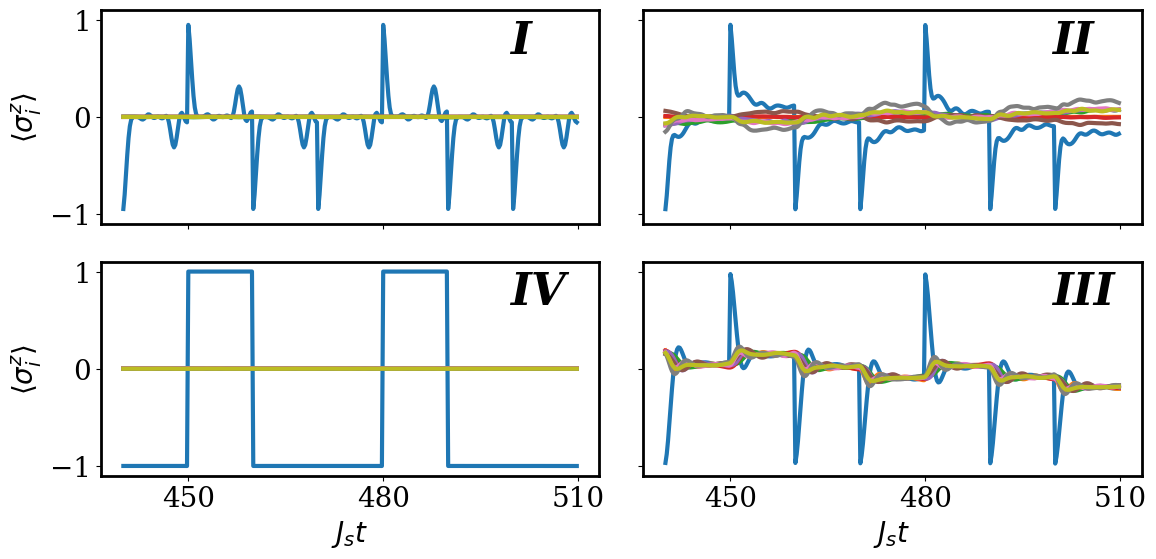

In [13]:
phase_transision_sigmaz_dynamics(L=9,
            h_list=[0.01, 0.01, 100, 100],
            W_list=[0.01, 2,    100, 0.01],
            plot_save=True)

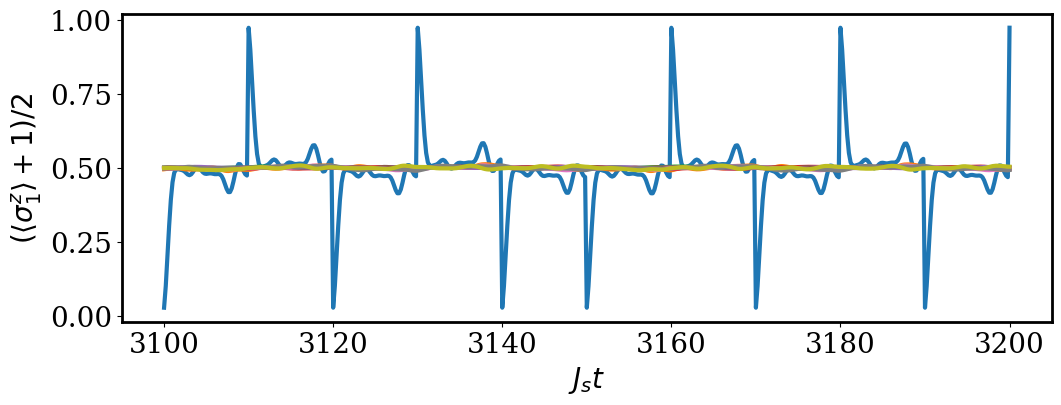

In [14]:
sigma_z_evolution(L=9, Js=1, h=0.2, W=0.01, Vmp=50, task_name='PC', plot_save=False, inp_sig=False, L_max=9)

# QRC Performance

## QRC optimmisation

In [53]:
from cycler import cycler

def qrc_performance_plot(
        L, Js, Vmp, sweep_param, dt_list, task_name, h_dt_zip, W_dt_zip,
        fixed_h=None, fixed_W=None,
        pm='Capacity', plot_save=True, legend=False):

    fig = plt.figure(figsize=(12, 8))  # bigger height for 2 rows

    gs = gridspec.GridSpec(nrows=2, ncols=3, width_ratios=[2,1, 0.2], height_ratios=[1,1], figure=fig, wspace=0.42, hspace=0.35)

    # Row 0 - sweeping h
    ax1_h = fig.add_subplot(gs[0, 0])
    ax2_h = fig.add_subplot(gs[0, 1])
    axins_h = inset_axes(ax2_h, width="100%", height="100%", bbox_to_anchor=(0.65, 0.85, 0.5, 0.3),
                        bbox_transform=ax2_h.transAxes, borderpad=0)

    # Row 1 - sweeping W
    ax1_W = fig.add_subplot(gs[1, 0])
    ax2_W = fig.add_subplot(gs[1, 1])
    axins_W = inset_axes(ax2_W, width="100%", height="100%", bbox_to_anchor=(0.65, 0.85, 0.5, 0.3),
                        bbox_transform=ax2_W.transAxes, borderpad=0)
    
    # Legend axis (empty)
    ax_leg_h = fig.add_subplot(gs[0, 2])
    ax_leg_W = fig.add_subplot(gs[1, 2])
    ax_leg_h.axis('off')
    ax_leg_W.axis('off')


    # Then create two helper functions like your current run_for_plot and run_for_plot1,
    # but pass axes explicitly and call for each sweep separately:
    colors=["dodgerblue", "black", "forestgreen", "firebrick", "darkgoldenrod"]
    dt_color_map = dict(zip(dt_list, colors))
    
    def run_for_plot(data, dt, ax):
        x = data['sweep_values']
        y = data['C_mean']
        y_std = data['C_std']
        ax.plot(x, y, marker='o', markersize=8, label=rf'$\Delta t$ = {dt}', color=dt_color_map[dt])
        ax.fill_between(x, y - y_std, y + y_std, alpha=0.2, color=dt_color_map[dt])

    def run_for_plot1(data, h, W, dt, ax, axins, h_label=False, W_label=False):
        x = data['delays']
        y = data['C_mean']
        y_std = data['C_std']
        label = fr'h={h}, $\Delta t$ = {dt}' if h_label else fr'W={W}, $\Delta t$ = {dt}'
        ax.plot(x, y, marker='', label=label, markersize=12, color=dt_color_map[dt])
        ax.fill_between(x, y - y_std, y + y_std, alpha=0.2, color=dt_color_map[dt])
        axins.plot(x, y, marker='o', markersize=6, color=dt_color_map[dt])
        axins.fill_between(x, y - y_std, y + y_std, alpha=0.2, color=dt_color_map[dt])
        if task_name == "STM":
            axins.set_xlim(0, 5)
        elif task_name == "PC":
            axins.set_xlim(0.6, 4.5)
        axins.set_ylim(0.9, 1.01)

    # Example for h sweep
    for dt in dt_list:
        path = f'{task_name}/QRC/{pm}_L{L}_Js{Js}_V{Vmp}_D1_Nrep1_W{fixed_W}_dt{dt}_ax_zxy_cax_zxy_sweeph.npz'
        data = load_data(path_to_file=path)
        run_for_plot(data, dt, ax1_h)

    if h_dt_zip is not None:
        for h, dt in h_dt_zip:
            path = f'{task_name}/QRC/{pm}_L{L}_Js{Js}_V{Vmp}_D1_Nrep1_h{h}_W{fixed_W}_dt{dt}_ax_zxy_cax_zxy_sweep_delay.npz'
            data = load_data(path_to_file=path)
            run_for_plot1(data, h, fixed_W, dt, ax2_h, axins_h, h_label=True)

    ax1_h.set_xscale('log')
    ax1_h.set_ylabel('C')

    # Text inside first column only for row 0
    ax1_h.text(0.1, 0.85, r'I', size=25, fontstyle='italic', weight='semibold', transform=ax1_h.transAxes)
    if task_name =='STM':
        ax1_h.text(0.05, 0.7, f'W={fixed_W}', transform=ax1_h.transAxes, size=18)
    elif task_name == "PC":
        ax1_h.text(0.05, 1.05, f'W={fixed_W}', transform=ax1_h.transAxes, size=18)
    ax1_h.text(0.8, 0.85, r'III', size=25, fontstyle='italic', weight='semibold', transform=ax1_h.transAxes)
    ax1_h.axvline(0.2, color='grey', linestyle='--')

    ax2_h.set_ylabel(r'C($\tau$)')
    if task_name == "STM":
        ax2_h.set_xlim(-0.5, 50)
    elif task_name == "PC":
        ax2_h.set_xlim(0.5, 10)

    # Remove xlabel on top row
    ax1_h.set_xlabel('h')
    ax2_h.set_xlabel('')

    # For W sweep (row 1)
    for dt in dt_list:
        path = f'{task_name}/QRC/{pm}_L{L}_Js{Js}_V{Vmp}_D1_Nrep1_h{fixed_h}_dt{dt}_ax_zxy_cax_zxy_sweepW.npz'
        data = load_data(path_to_file=path)
        run_for_plot(data, dt, ax1_W)

    if W_dt_zip is not None:
        for W, dt in W_dt_zip:
            path = f'{task_name}/QRC/{pm}_L{L}_Js{Js}_V{Vmp}_D1_Nrep1_h{fixed_h}_W{W}_dt{dt}_ax_zxy_cax_zxy_sweep_delay.npz'
            data = load_data(path_to_file=path)
            run_for_plot1(data, fixed_h, W, dt, ax2_W, axins_W, W_label=True)

    ax1_W.set_xscale('log')
    ax1_W.set_xlabel('W')
    ax1_W.set_ylabel('C')

    # Text inside first column only for row 1
    ax1_W.text(0.1, 0.85, r'III', size=25, fontstyle='italic', weight='semibold', transform=ax1_W.transAxes)
    ax1_W.text(0.8, 0.7, f'h={fixed_h}', transform=ax1_W.transAxes, size=18)
    ax1_W.text(0.8, 0.85, r'IV', size=25, fontstyle='italic', weight='semibold', transform=ax1_W.transAxes)
    ax1_W.axvline(4, color='grey', linestyle='--')

    ax2_W.set_xlabel(r'$\tau$')
    ax2_W.set_ylabel(r'C($\tau$)')
    if task_name == "STM":
        ax2_W.set_xlim(-0.5, 50)
    elif task_name == "PC":
        ax2_W.set_xlim(0.5, 10)

    ax2_h.plot([],[], label='W=0.01', color='white')
    ax2_W.plot([],[], label='h=10', color='white')

    # Add a single legend for all lines from ax1_h and ax1_W (assuming same labels/colors)
    handles_h, labels_h = ax1_h.get_legend_handles_labels()
    handles = handles_h
    labels = labels_h
    ax1_W.legend(handles, labels, loc=(-0.1,-0.58), ncol=3, frameon=False, fontsize=14)

    # Place legend inside the right column axis, centered vertically
    handles_h, labels_h = ax2_h.get_legend_handles_labels()
    handles = handles_h
    labels = labels_h
    ax_leg_h.legend(handles, labels, loc='center', frameon=False, fontsize=14)

    handles_W, labels_W = ax2_W.get_legend_handles_labels()
    handles = handles_W
    labels = labels_W
    ax_leg_W.legend(handles, labels, loc='center', frameon=False, fontsize=14)


    # fig.tight_layout(rect=[0, 0.05, 1, 1])  # leave space at bottom for legend
    fig.subplots_adjust(bottom=0.15)
    mark_inset(ax2_W, axins_W, loc1=2, loc2=3, fc="none", ec="0.5")
    mark_inset(ax2_h, axins_h, loc1=2, loc2=3, fc="none", ec="0.5")

    if plot_save:
        plt.savefig(f"results/plots/QRC_performance_task{task_name}_combined.png", dpi=600, bbox_inches='tight')

    plt.show()


    return

### Linear Task -- STM

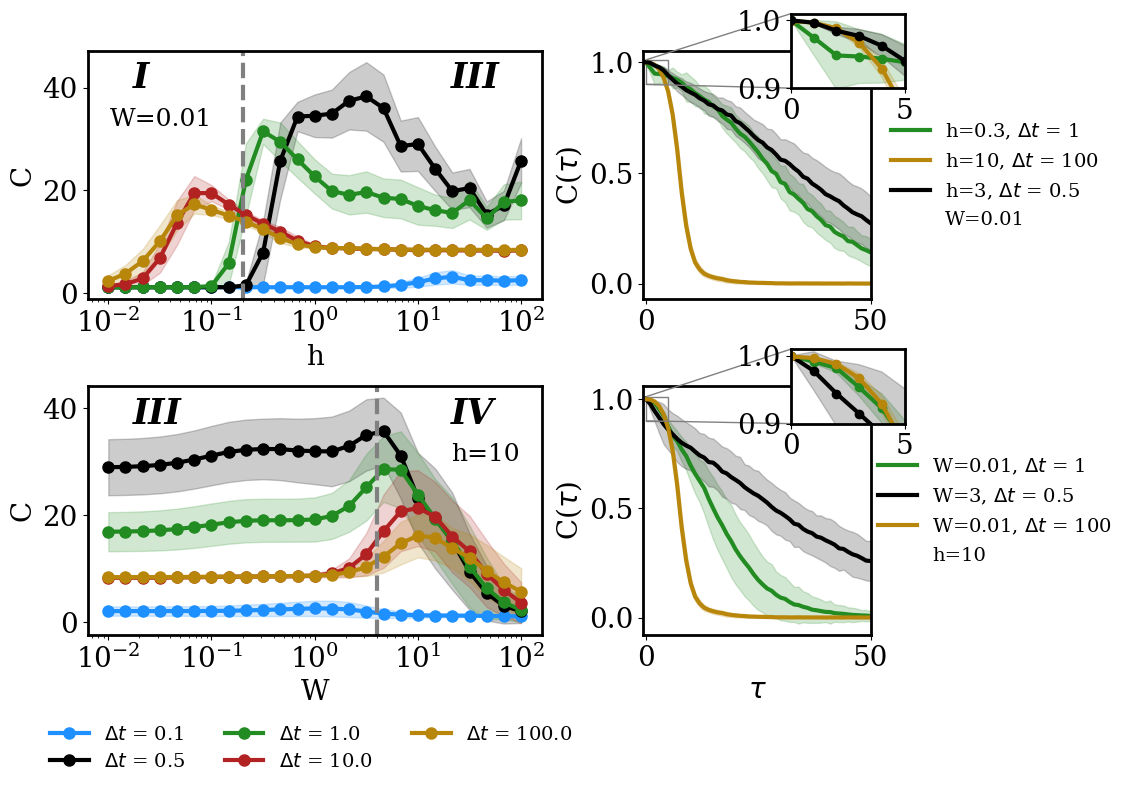

In [54]:
qrc_performance_plot(L=9, Js=1, Vmp=1, sweep_param='h', dt_list=[0.1, 0.5, 1.0, 10.0, 100.0], 
                     h_dt_zip=zip([0.3, 10, 3],[1, 100, 0.5]), W_dt_zip=zip([0.01, 3, 0.01],[1, 0.5, 100]),
                     task_name='STM', fixed_W=0.01, fixed_h=10, pm='Capacity', 
                     legend=False, plot_save=True)

### Non-Linear Task -- PC

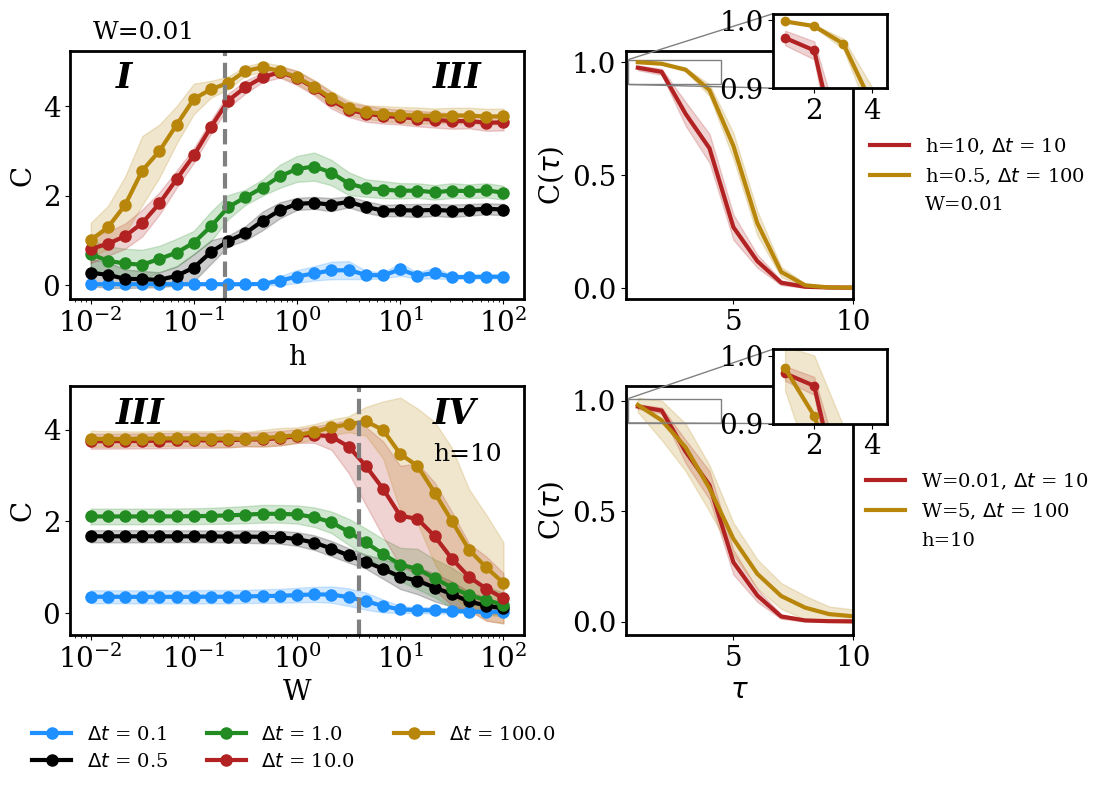

In [55]:
qrc_performance_plot(L=9, Js=1, Vmp=1, sweep_param='h', dt_list=[0.1, 0.5, 1.0, 10.0, 100.0], 
                     h_dt_zip=zip([10, 0.5],[10, 100]), W_dt_zip=([0.01, 10],[5, 100]),
                     task_name='PC', fixed_W=0.01, fixed_h=10, pm='Capacity', 
                     legend=True, plot_save=True)

# Hybrid architecture

## ESN Optimisation

In [18]:
def esn_2D_performance_plot_Qinp(N_esn, pm, task_name, g, qtask='Tracerho2', inp_type='qubit', plot_save=True):

    fig = plt.figure(figsize=(16, 5))
    spec = gridspec.GridSpec(nrows=1, ncols=2)
    ax0 = fig.add_subplot(spec[0, 0])  # Only z
    ax1 = fig.add_subplot(spec[0, 1])

    data = load_data(f'{task_name}/{qtask}/ESN/{inp_type}/{pm}_Nesn{N_esn}_sweep_gl_ax_zxy.npz')

    x = data['g_val']
    y = data['l_val']
    z = data[f'C_mean {qtask}']

    X, Y = np.meshgrid(x, y) # create a meshgrid for the g and l values
    Z = z.T # transpose the C_mean array

    cs = ax0.contourf(X, Y, Z, cmap='PiYG', levels=20)
    # cs1 = ax0.contour(cs, levels = cs.levels[::5], colors='k')

    # ax0.clabel(cs1, fmt='%2.1f', colors='k', fontsize=14)

    cbar = fig.colorbar(cs, label='C')
    # cbar.add_lines(cs1)

    ax0.set_xlabel('g')
    ax0.set_ylabel('l')
    ax0.set_yscale('log')

    # Print maximum performance
    max_index = np.unravel_index(np.argmax(z, axis=None), z.shape)
    max_g = x[max_index[0]]
    max_l = y[max_index[1]]
    max_C = z[max_index]
    print(f"maximum performance {task_name}: g={max_g}, l={max_l}, C={max_C}")

    ax1.plot([], [], ' ', label=f'g = {g}')  # dummy handle
    ax1.fill_between([], [], [], alpha=0.0)


    for l in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
        data = load_data(f'{task_name}/{qtask}/ESN/{inp_type}/NMSE_Nesn{N_esn}_g{g}_l{l}_ax_zxy_sweep_delay.npz')
        C = data[f'C_mean {qtask}']
        C_std = data[f'C_std {qtask}']
        delays = data['delays']
        # Format as power of 10
        exp = int(f"{l:.0e}".split("e")[-1])   # extract exponent
        label_str = f"l $ = 10^{{{exp}}}$"
        ax1.plot(delays, C, marker='o', markersize=12, label=label_str)
        ax1.fill_between(delays, C-C_std, C+C_std, alpha=0.3)

    ax1.legend(frameon=False, fontsize=18, loc='best')

    if qtask in ['Tracerho2', 'Entropy']:
        ax1.set_xlim(-0.5,5)
    ax1.set_yscale('log')
    ax1.set_ylabel('NMSE')
    ax1.set_xlabel(r'$\tau$')
    
    plt.tight_layout()

    if plot_save:
        plt.savefig(f'results/plots/esn_opt_Nesn{N_esn}_task{qtask}.png', dpi=600)
    
    plt.show()


    return

maximum performance Qinp: g=0.001, l=0.00223872113856834, C=0.9999983312692001


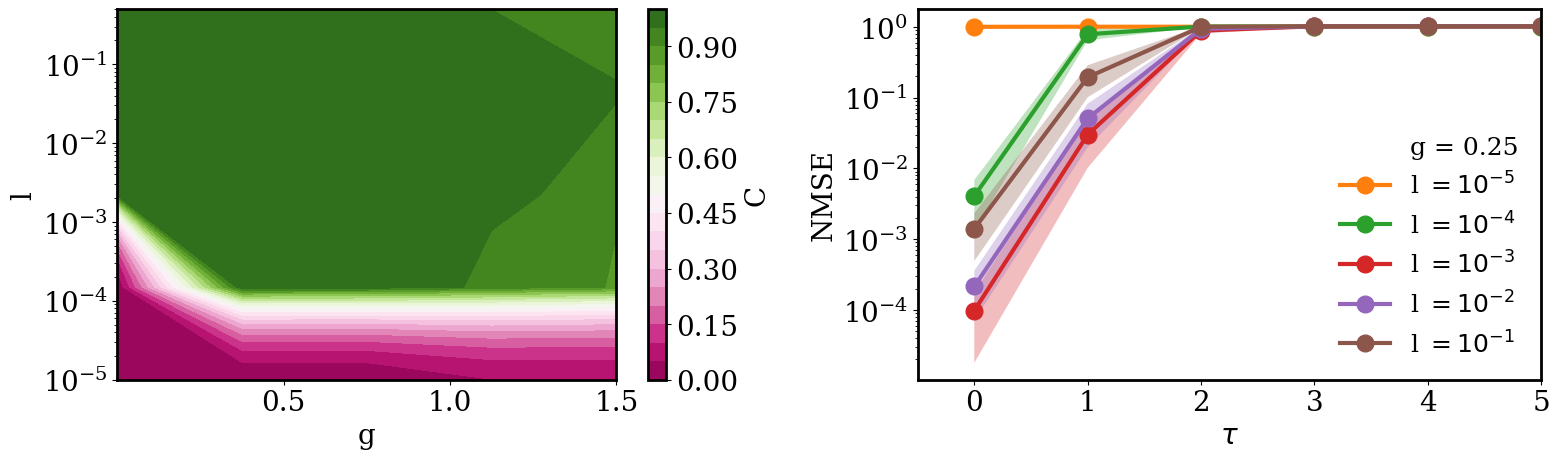

In [19]:
esn_2D_performance_plot_Qinp(N_esn=45, pm='Capacity', task_name='Qinp', qtask='Tracerho2', g =0.25, plot_save=False)

maximum performance Qinp: g=3.556111111111111, l=1.8478497974222908e-05, C=12.597145094443498


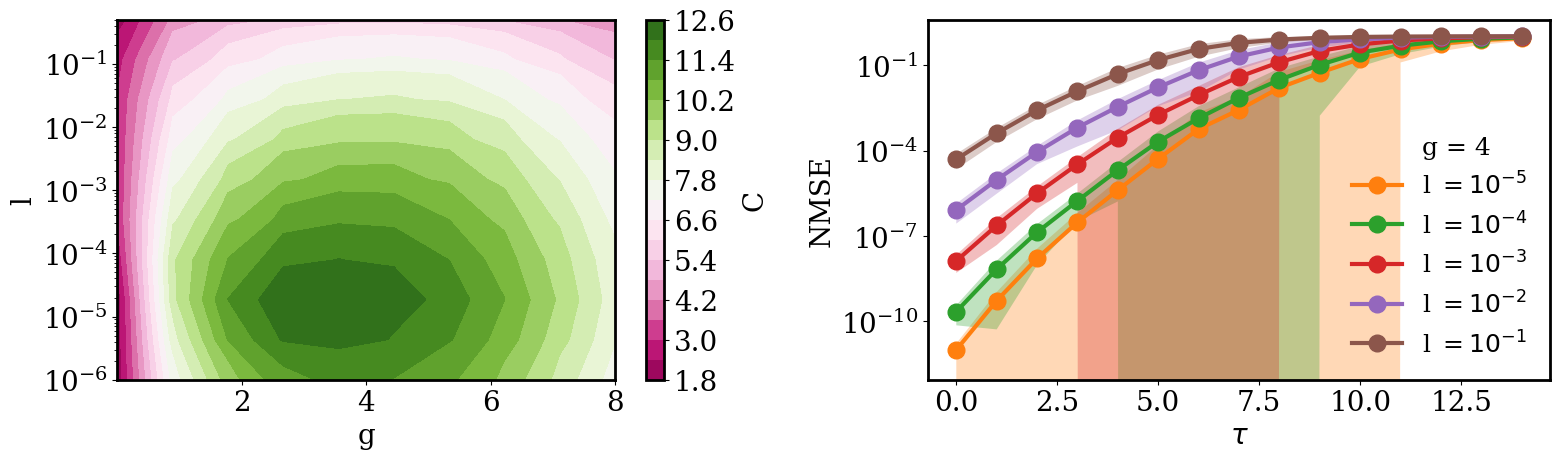

In [20]:
esn_2D_performance_plot_Qinp(N_esn=45, pm='Capacity', task_name='Qinp', qtask='Sigman', g =4, plot_save=True) 

## Quantum Preprocessing

### Ginibre ensemble random input

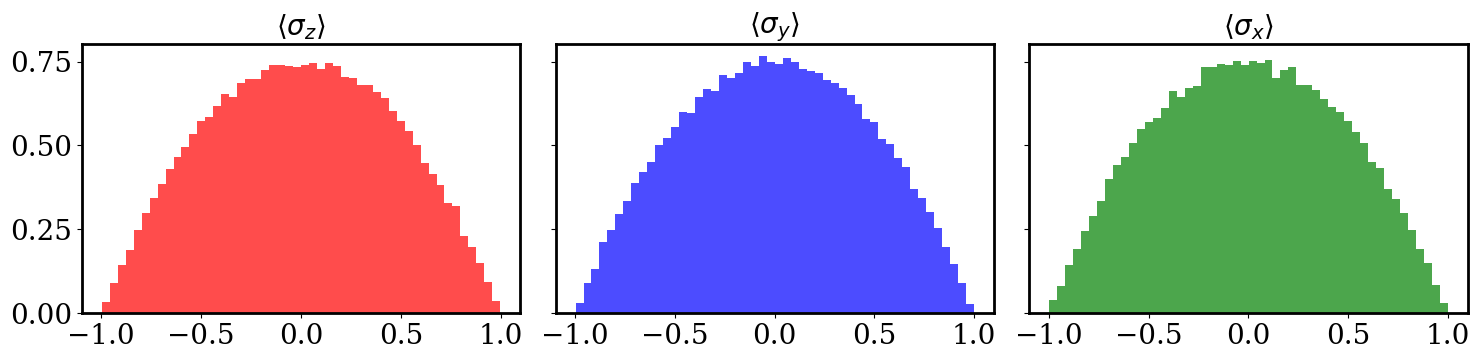

In [21]:
import qutip

# Collect expectation values
sz, sy, sx = [], [], []
purity, entropy = [], []
for _ in range(100000):
    rho = qutip.rand_dm(2)   # random density matrix
    sz.append(qutip.expect(qutip.sigmaz(), rho))
    sy.append(qutip.expect(qutip.sigmay(), rho))
    sx.append(qutip.expect(qutip.sigmax(), rho))
    eig = rho.eigenenergies()
    purity.append(np.sum(eig**2))
    entropy.append(qutip.entropy_vn(rho, base=2))

# Create 3 side-by-side histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axes[0].hist(sz, bins=50, density=True, color="red", alpha=0.7)
axes[0].set_title(r'$\langle \sigma_z \rangle$')

axes[1].hist(sy, bins=50, density=True, color="blue", alpha=0.7)
axes[1].set_title(r'$\langle \sigma_y \rangle$')

axes[2].hist(sx, bins=50, density=True, color="green", alpha=0.7)
axes[2].set_title(r'$\langle \sigma_x \rangle$')

plt.tight_layout()
plt.savefig('results/plots/pauli_distribution_ginibre_qubit.png', dpi=600)
plt.show()


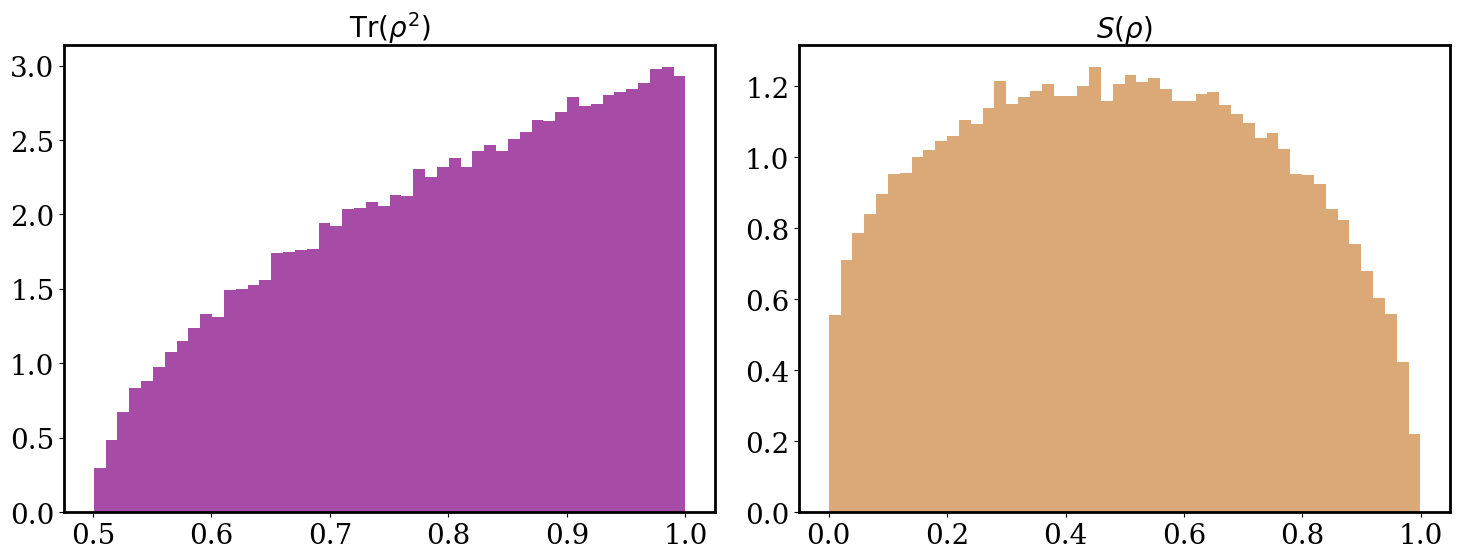

In [22]:
# Create 3 side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].hist(purity, bins=50, density=True, color="purple", alpha=0.7)
axes[0].set_title(r'$\mathrm{Tr}(\rho^2)$')

axes[1].hist(entropy, bins=50, density=True, color="peru", alpha=0.7)
axes[1].set_title(r'$S(\rho)$')

plt.tight_layout()
plt.savefig('results/plots/purity_entanglement_ginibre_qubit.png', dpi=600)
plt.show()

## QRC prepocessing performance

In [23]:
import qutip

def plot_single_axis_dependence(L=9, h=10, W=0.01, Vmp=1, Dmp=1, N_rep=1, dt=10, Js=1, inp_type='qubit', legend=True):
	fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)  # 1 row, 3 cols
	dict ={
	'z': qutip.sigmaz(),
	'x': qutip.sigmax(),
	'y': qutip.sigmay(),
	}
	colors = ['chocolate', 'midnightblue', 'mediumvioletred']

	for idx, axis1 in enumerate(['x', 'y', 'z']):
		ax = axes[idx]

		path = f'Qinp/QPreprocess/{inp_type}/Capacity_L{L}_Js{Js}_V{Vmp}_D{Dmp}_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{axis1}_sweep_delay.npz'
		data = load_data(path)

		delays = data['delays']
		
		for idx2,axis2 in enumerate(['x', 'y', 'z']):
			C_mean = data[f'C_mean {axis2}']
			C_std = data[f'C_std {axis2}']

			ax.plot(delays, C_mean, marker='o', markersize=12, label=fr'$\langle \sigma_1^{{{axis2}}} \rangle$', color=colors[idx2])
			ax.fill_between(delays, C_mean - C_std, C_mean + C_std, alpha=0.2, color=colors[idx2])

		ax.set_title(f"{axis1}-axis measurement")
		ax.set_xlabel(r'$\tau_{{QRC}}$')

	axes[0].set_ylabel('C')
	if legend:
		axes[0].legend(fontsize=16, frameon=False)

	plt.tight_layout()
	plt.savefig(f'results/plots/Capacity_one_axis_measurement_L{L}_h{h}_W{W}_dt{dt}_V{Vmp}.png', dpi=600)
	plt.show()

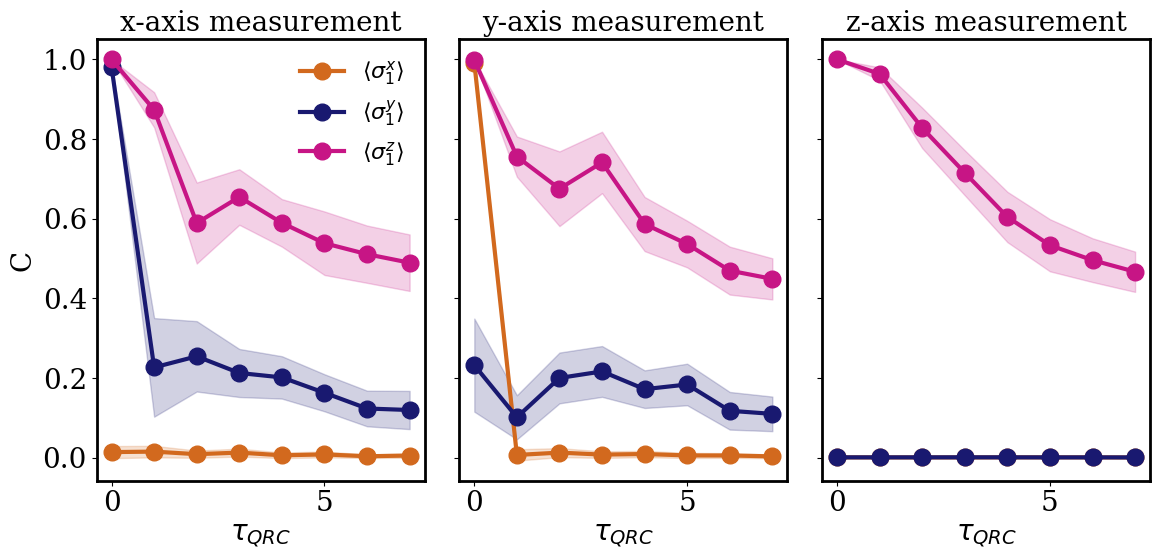

In [24]:
plot_single_axis_dependence(L=9, h=3, W=0.01, Vmp=1, Dmp=1, N_rep=1, dt=0.5, Js=1)

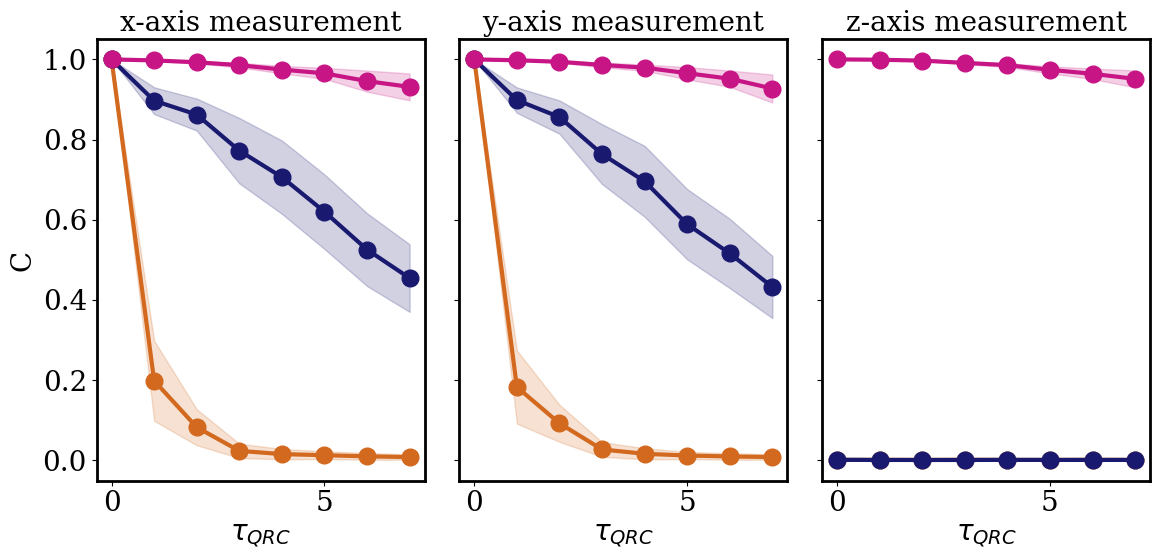

In [25]:
plot_single_axis_dependence(L=9, h=3, W=0.01, Vmp=10, Dmp=1, N_rep=1, dt=0.5, Js=1, legend=False)

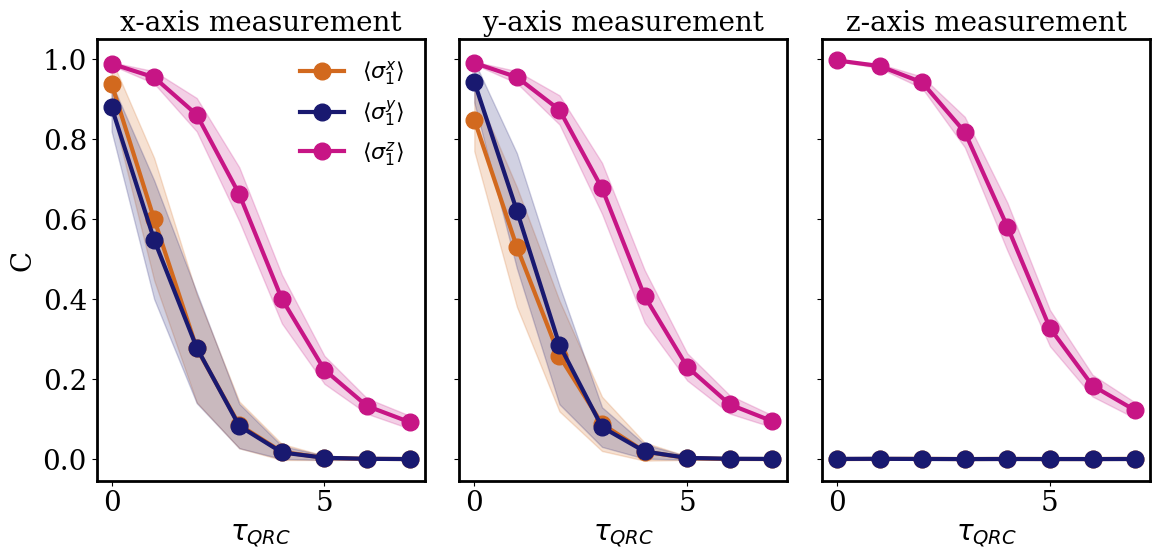

In [26]:
plot_single_axis_dependence(L=9, h=3, W=0.01, Vmp=1, Dmp=1, N_rep=1, dt=5, Js=1, legend=True)

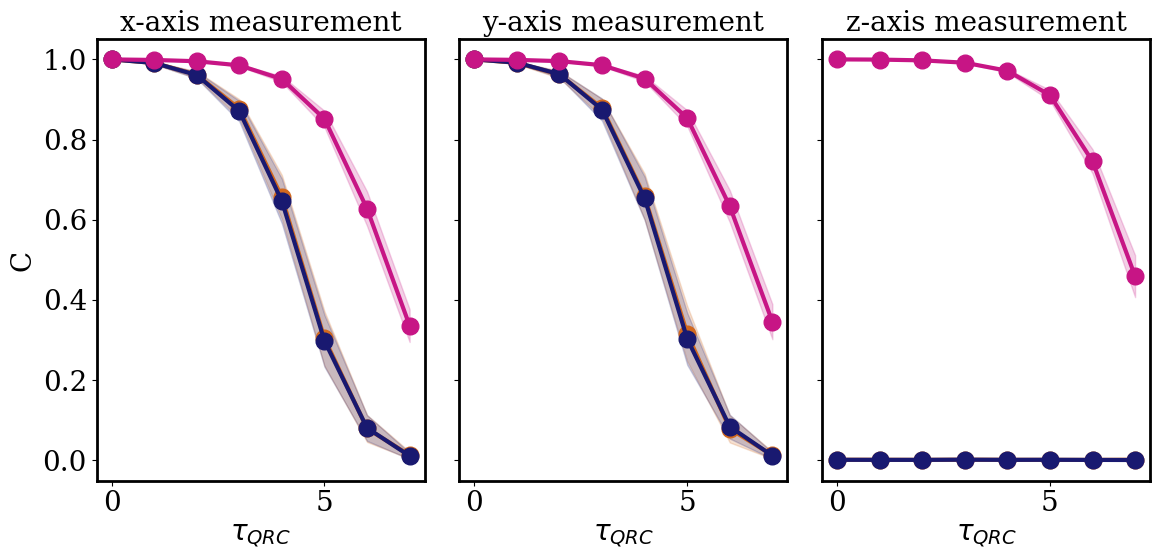

In [27]:
plot_single_axis_dependence(L=9, h=3, W=0.01, Vmp=10, Dmp=1, N_rep=1, dt=5, Js=1, legend=False)

## Info transmission dependence

In [28]:
def load_and_plot(ax, path, color, label=None, task_name='Tracerho2'):
    data = load_data(path)
    delays = data['delays']
    C_mean = data[f'C_mean {task_name}']
    C_std = data[f'C_std {task_name}']
    ax.plot(delays, C_mean, marker='o', markersize=10, color=color, label=label)
    ax.fill_between(delays, C_mean - C_std, C_mean + C_std, alpha=0.2, color=color)

def make_path(model, axname, caxname, extra, task_name='Tracerho2', inp_type='qubit', **kwargs):
    base = f"Qinp/{task_name}/{model}/"
    base += f"{inp_type}/"
    filename = f"{kwargs['pm']}_L{kwargs['L']}_Js{kwargs['Js']}_V{kwargs['Vmp']}_D{kwargs['D']}_Nrep{kwargs['N_rep']}_h{kwargs['h']}_W{kwargs['W']}_dt{kwargs['dt']}_ax_{axname}_cax_{caxname}"
    if model == "HYB":
        filename += f"_Nesn{kwargs['N_esn']}_g{kwargs['g']}_l{kwargs['l']}_delayqrc{kwargs['delayqrc']}"
    elif model == "ESN":
        filename += f"_Nesn{kwargs['N_esn_solely']}_g{kwargs['g']}_l{kwargs['l']}"
    filename += "_sweep_delay.npz"
    return base + filename

def ESN_QRC_Hybrid_comparison_info(L, Js, h, W, Vmp, Dmp, Dmp_full, dt,
                                g, l, pm='Capacity', task_name='Tracerho2',
                                   delayqrc=0.5, N_rep=1, inp_type='qubit'):

    fig = plt.figure(figsize=(18, 10))  # Taller figure to fit bar plot row
    spec = gridspec.GridSpec(nrows=2, ncols=5, height_ratios=[2, 2])  

    # First row: original line plots
    ax0 = fig.add_subplot(spec[0, 0])
    ax1 = fig.add_subplot(spec[0, 1], sharey=ax0)
    ax2 = fig.add_subplot(spec[0, 2], sharey=ax0)
    ax3 = fig.add_subplot(spec[0, 3], sharey=ax0)
    ax4 = fig.add_subplot(spec[0, 4], sharey=ax0)
    axes = [("z", ax0, 45, 45), ("x", ax1, 45, 45), ("y", ax2, 45, 45),
            ("xy", ax3, 45, 45), ("zxy", ax4, 45, 45)]

    # Second row: barplot spanning all columns
    ax_bar = fig.add_subplot(spec[1, :])

    models = [
        ("HYB", "forestgreen", r'Hybrid $(\tau_{\mathrm{QRC}} = \lfloor %.1f \tau \rfloor)$' % delayqrc if
         delayqrc == 0.5 else r'Hybrid $(\tau_{\mathrm{QRC}} = 0)$'
),
        ("QRC", "red", "QRC (L=%d)" % L),
        ("ESN", "royalblue", r"ESN ($N_{{ESN}}$ =45)")
    ]

    # Store results grouped by observable
    bar_data = {axname: {"means": [], "stds": [], "labels": [], "colors": []} for axname, *_ in axes}
    inset_data = []  # store per axis
    z = 0
    for axname, ax, N_esn, N_esn_solely in axes:
        for model, color, label in models:
            if model == "QRC" and task_name in ['Entropy', 'Tracerho2']:
                dt1 = 100
                h1 = 0.5
            else:
                dt1 = dt
                h1 = h
            kwargs = dict(L=L, Js=Js, Vmp=Vmp, N_rep=N_rep, h=h1, W=W, pm=pm,
                          D=Dmp if model != "QRC" else Dmp_full,
                          N_esn=N_esn, N_esn_solely=N_esn_solely,
                          g=g, l=l, delayqrc=delayqrc, dt=dt1)
            path = make_path(model, axname, axname, '', task_name=task_name, inp_type=inp_type, **kwargs)
            data = load_data(path)

            delays = data['delays']
            C_mean = data[f'C_mean {task_name}']
            C_std = data[f'C_std {task_name}']
            if axname == 'zxy' and task_name == 'Fidelity':
                inset_data.append([C_mean, C_std]); z+=1
            # Line plots
            ax.plot(delays, C_mean, marker='o', markersize=10, color=color)
            ax.fill_between(delays, C_mean - C_std, C_mean + C_std, alpha=0.2, color=color)

            # For barplot: pick τ=1
            if 1 in delays:
                idx = np.where(delays == 1)[0][0]
                bar_data[axname]["means"].append(C_mean[idx])
                bar_data[axname]["stds"].append(C_std[idx])
                bar_data[axname]["labels"].append(model)   # use short model names
                bar_data[axname]["colors"].append(color)

        ax.set_xlabel(r'$\tau$')
        if task_name == 'Tracerho2' or task_name == 'Entropy':
            ax.set_xlim(-0.25, 4)
        elif task_name == 'Sigman':
            ax.set_xlim(-1, 10)
        if task_name != "Fidelity":
            ax.set_yscale('log')
            ax.text(0.75, 0.1, axname, transform=ax.transAxes)
        else:
            ax.text(0.75, 0.75, axname, transform=ax.transAxes)

        if task_name == 'Entanglement' and inp_type != 'werner':
            ax.set_xlim(-0.25, 4)

    # ylabel
    if pm == 'Capacity':
        ylabel = 'C' 
    elif pm == 'NMSE':
        ylabel ='NMSE'
    elif pm == 'Fidelity':
        ylabel = 'F'
    ax0.set_ylabel(ylabel)

    if pm == 'NMSE':
        for ax in [ax0, ax1, ax2, ax3, ax4]:
            ax.set_yscale('log')

    # --- Grouped Bar plot ---
    group_names = list(bar_data.keys())  # ["z", "x", "y", "xy", "zxy"]
    n_groups = len(group_names)
    n_models = len(models)
    x = np.arange(n_groups)  # group positions
    width = 0.25  # bar width

    for i, model in enumerate(models):
        means = [bar_data[axname]["means"][i] for axname in group_names]
        stds = [bar_data[axname]["stds"][i] for axname in group_names]
        ax_bar.bar(x + i*width - width, means, width, yerr=stds, capsize=5,
                   label=model[2], color=model[1], alpha=0.9)

    ax_bar.set_xticks(x)
    ax_bar.set_xticklabels(group_names)
    ax_bar.set_ylabel(ylabel)
    ax_bar.set_title(r'Comparison at $\tau = 1$')
    if task_name != "Fidelity":
        ax_bar.set_yscale('log')
    else:
        if inp_type == 'qubit':
            ax_bar.set_ylim(0.8, 1.01)
        elif inp_type == '2qubit':
            ax_bar.set_ylim(0.7, 1.01)

    # Hide yticks (both ticks and labels) for all but the first column
    for ax in [ax1, ax2, ax3, ax4]:
        ax.tick_params(labelleft=False)   # hide labels
        # ax.yaxis.set_ticks_position('none')  # optional: remove tick marks too


    if task_name in ['Tracerho2','Entropy'] and inp_type == 'qubit':
        for ax in [ax0, ax1, ax2]:
            # Create an inset inside the first axis
            axins = inset_axes(ax, width="45%", height="65%", loc="lower left",
                        bbox_to_anchor=(0.15, 0.05, 0.9, 0.9), bbox_transform=ax.transAxes)

            # Copy the lines
            for line in ax.lines:
                axins.plot(line.get_xdata(), line.get_ydata(), color=line.get_color(), label=line.get_label())

            # Copy the fill_between (std shading)
            for poly in ax.collections:
                paths = poly.get_paths()
                if len(paths) > 0:  # filter out non-fill_between collections
                    verts = paths[0].vertices
                    x = verts[:, 0]
                    y = verts[:, 1]
                    axins.fill_between(x, y, alpha=poly.get_alpha(), color=poly.get_facecolor()[0])

            # Set zoomed y-limits around the region where curves overlap
            axins.set_ylim(0.4, 1.15)  # adjust depending on your data
            axins.set_xlim(0, 4)       # optional, zoom in time too if needed

            # Optional: linear scale in the inset
            axins.set_yscale("linear")

            # Hide inset tick labels if you want it cleaner
            axins.tick_params(labelleft=True, labelbottom=False, labelsize='x-small')

            ax.indicate_inset_zoom(axins, edgecolor="grey")



    # if task_name in ['Fidelity'] and inp_type == 'qubit':
    #     for ax in [ax4]:
    #         # Create an inset OUTSIDE the axis (to the right, mostly outside)
    #         axins = inset_axes(
    #             ax, width="45%", height="65%", loc='upper left',
    #             bbox_to_anchor=(1.05, 0.1, 1, 1),  # shift outside [x,y,w,h]
    #             bbox_transform=ax.transAxes, borderpad=0
    #         )

    #         for p, line in enumerate(ax.lines):
    #             x = line.get_xdata()
    #             y = line.get_ydata()
    #             y_zoom = 1 - y
    #             axins.plot(x, y_zoom, color=line.get_color(), label=line.get_label())
            
    #             # Recompute error band using stored C_mean and C_std
    #             # You need to have stored them somewhere; let's assume you have:
    #             # data = load_data(path) inside the main loop
    #             a = inset_data[p]
    #             C_mean = a[0]
    #             C_std = a[1]

    #             y_upper = 1 - (C_mean - C_std)
    #             y_lower = 1 - (C_mean + C_std)
    #             axins.fill_between(x, y_lower, y_upper, alpha=0.2, color=line.get_color())

    #         # Log scale
    #         axins.yaxis.tick_right()
    #         axins.yaxis.set_label_position("right")
    #         axins.set_ylabel("1 - F", fontsize=16)

    #         axins.set_yscale("log")
    #         axins.set_ylim(1e-12, 1e-1)
    #         axins.set_xlim(0, 10)

    #         # Tick formatting
    #         axins.tick_params(labelleft=False, labelbottom=True, labelsize='x-small')

            # Optional: show rectangle on main plot
            # ax.indicate_inset_zoom(axins, edgecolor="grey")

    # Legend + layout
    fig.legend(loc='lower center', ncol=3, frameon=False)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.15)
    plt.savefig(f'results/plots/{task_name}_hybrid_obseravbles_comparison_{inp_type}_h{h}_dt{dt}.png', dpi=600, bbox_inches="tight")



### Purity

/tmp/ipykernel_15320/3038555685.py:217: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


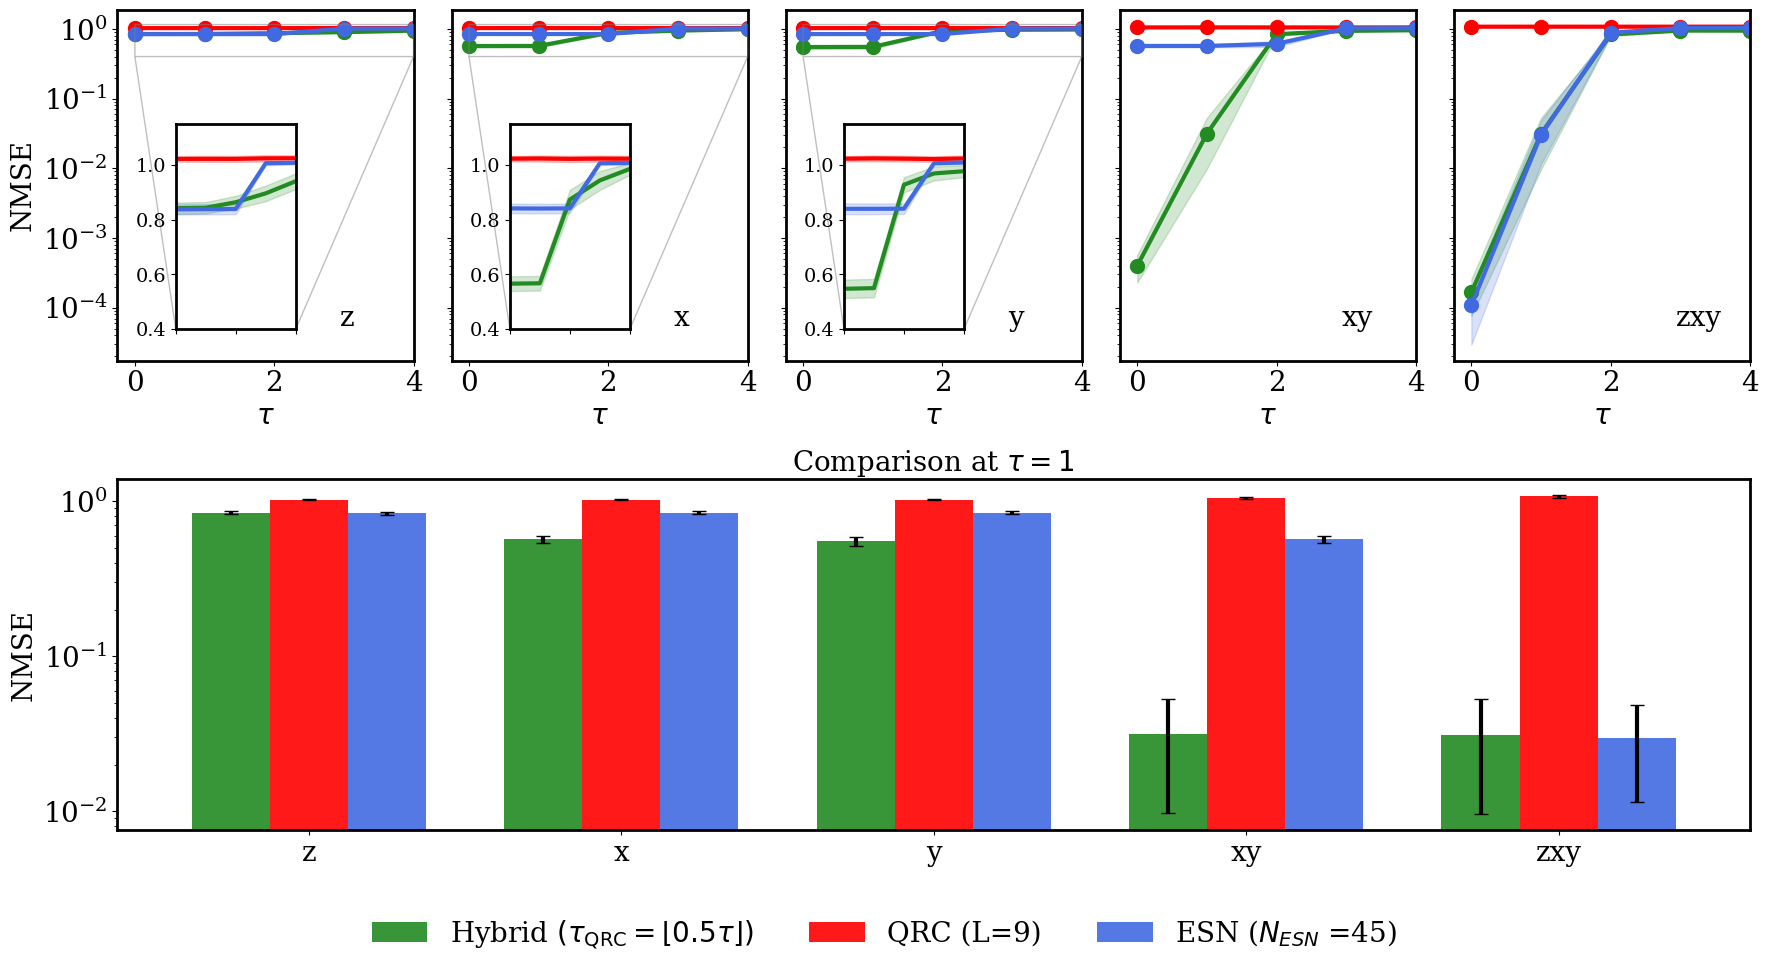

In [29]:
ESN_QRC_Hybrid_comparison_info(L=9, Js=1, h=3, W=0.01, Vmp=1, Dmp=1, Dmp_full=1,
							   g=0.25, l=0.001, pm='NMSE', dt=0.5, task_name='Tracerho2',
							   delayqrc=0.5, N_rep=1)

### Entropy

/tmp/ipykernel_15320/3038555685.py:217: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


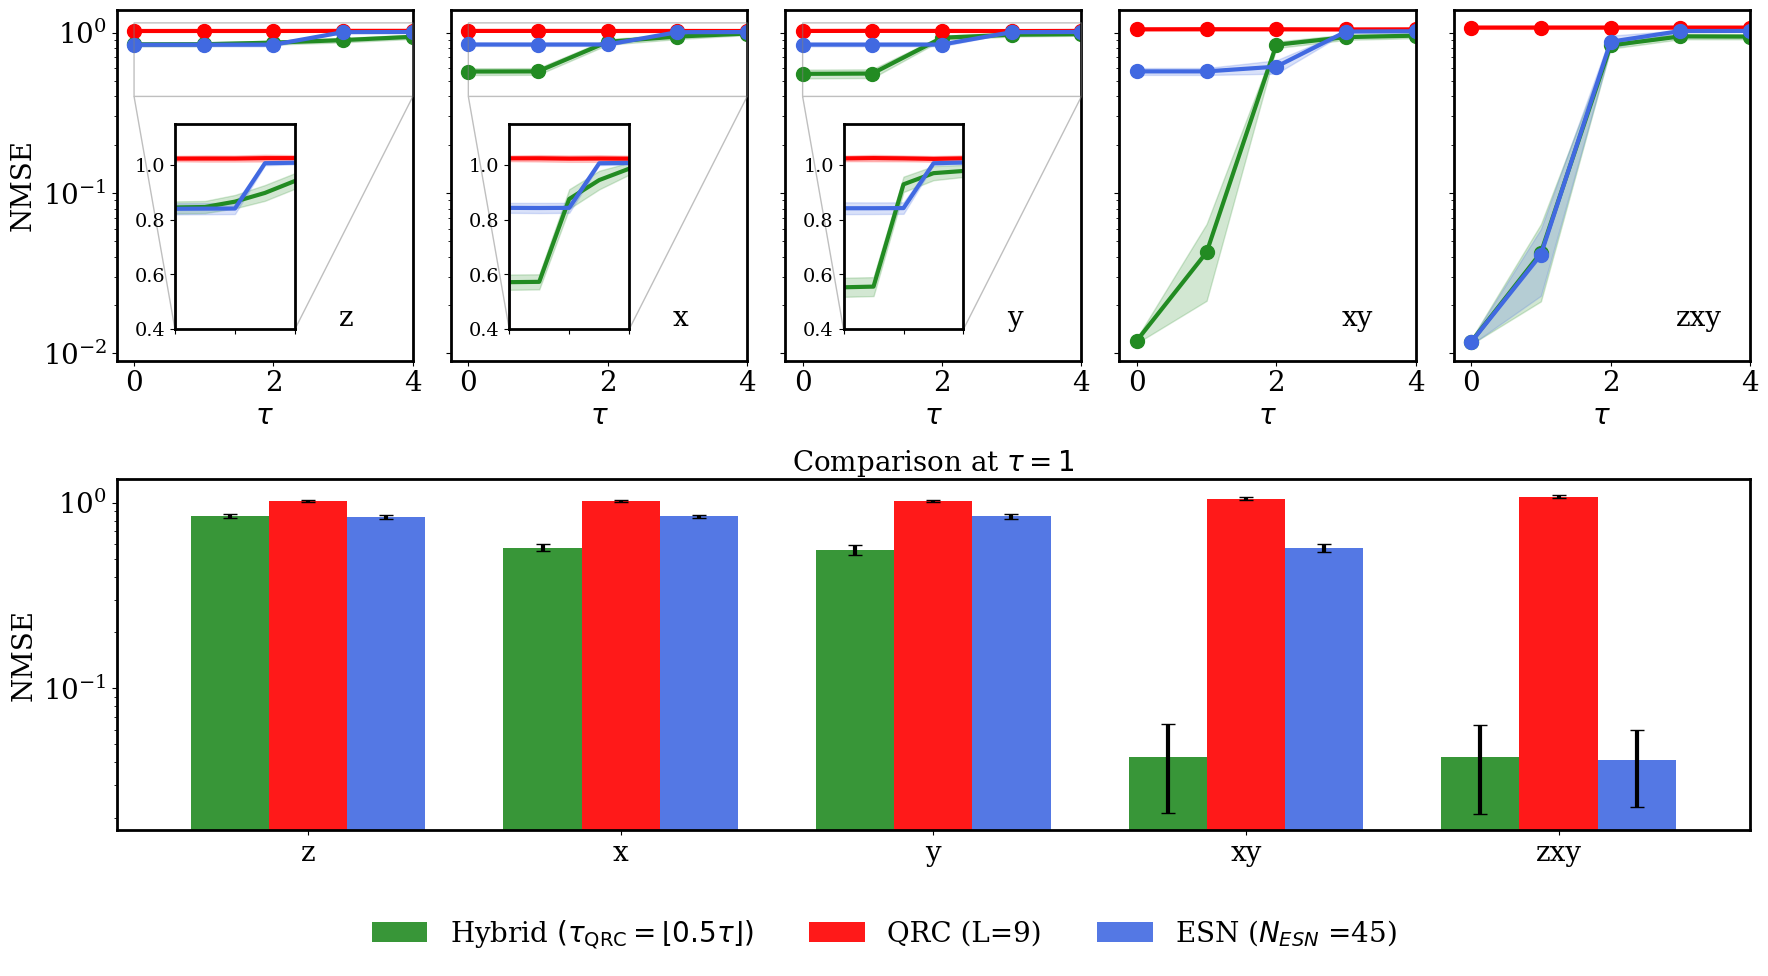

In [30]:
ESN_QRC_Hybrid_comparison_info(L=9, Js=1, h=3, W=0.01, Vmp=1, Dmp=1, Dmp_full=1, dt=0.5,
							   g=0.25, l=0.001, pm='NMSE', task_name='Entropy',
							   delayqrc=0.5, N_rep=1)

### Fidelity

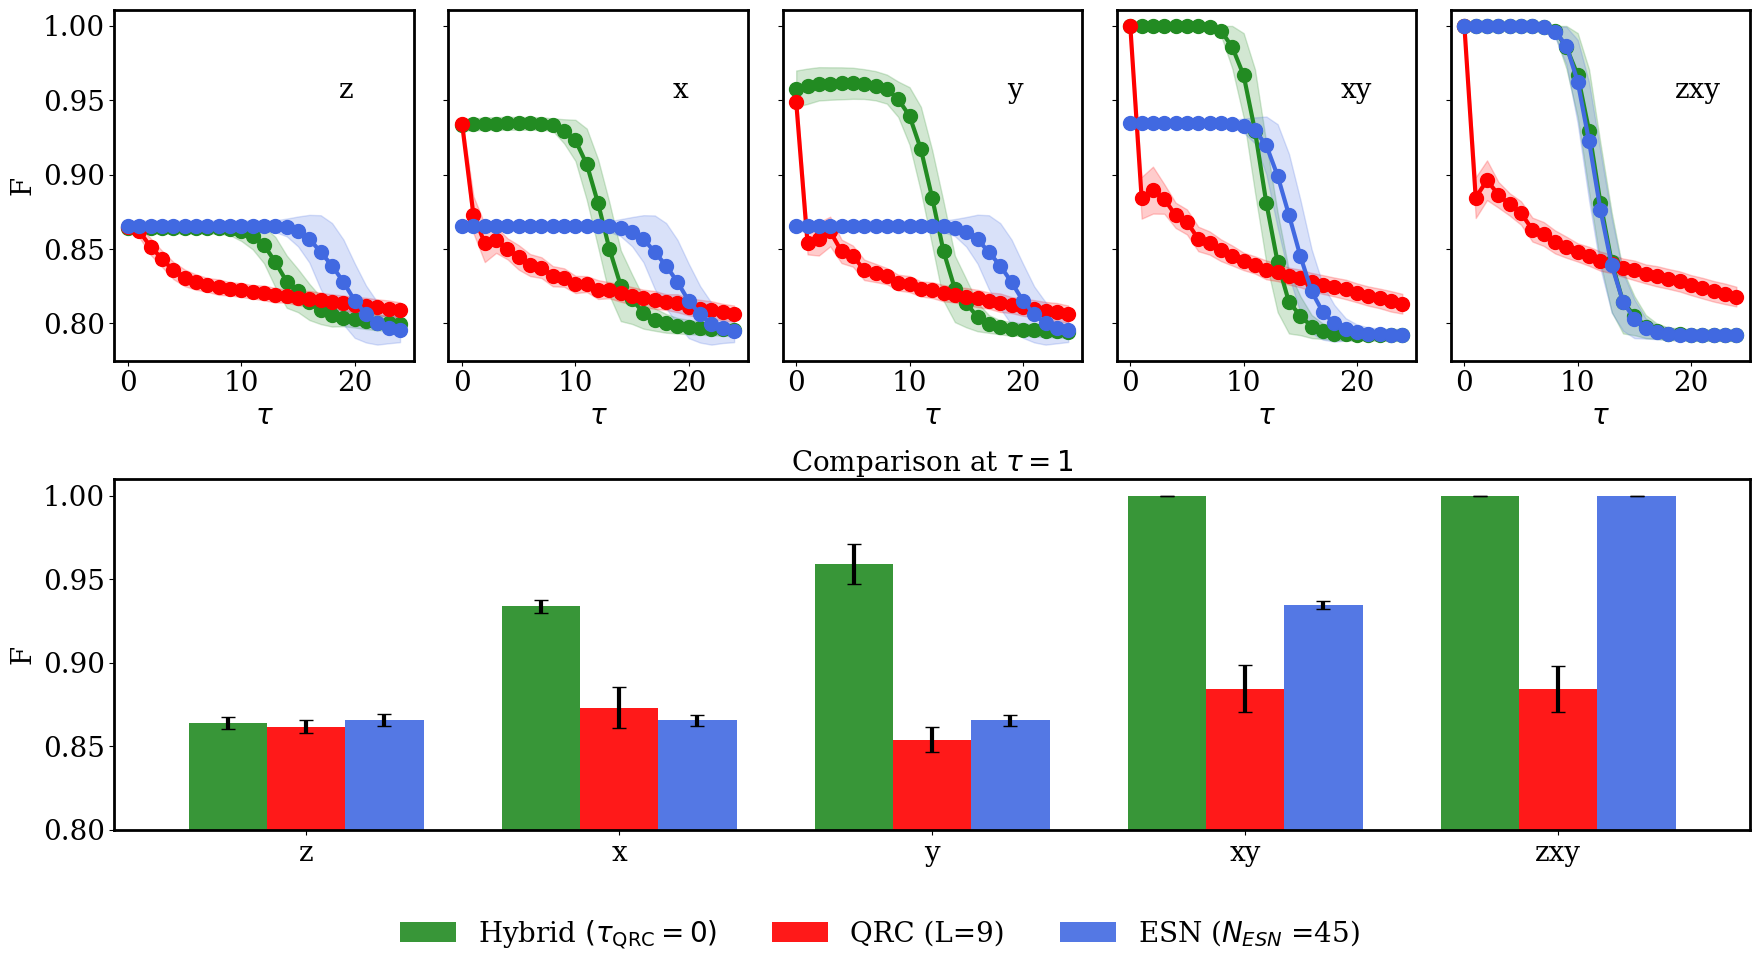

In [31]:
ESN_QRC_Hybrid_comparison_info(L=9, Js=1, h=3, W=0.01, Vmp=1, Dmp=1, Dmp_full=1, dt=0.5,
							   g=4, l=0.00001, pm='Fidelity', task_name='Fidelity',
							   delayqrc=0.0, N_rep=1)

## Time multiplexing

In [32]:
def tm_plot_comparison(L, Js, h, W, Nesn, g,l, pm, task_name, delay_qrc,
                       inp_type, Dmp=1, N_rep=1):
    
    fig = plt.figure(figsize=(8,5))
    spec = gridspec.GridSpec(nrows=1, ncols=2)

    ax0 = fig.add_subplot(spec[0, 0])
    ax1 = fig.add_subplot(spec[0, 1], sharey=ax0)
    axes = [ax0, ax1]

    colors = ['darkmagenta', 'peru']
    markers = ['o', '*']

    Vmp_list = [1, 10]
    dt_list = [0.5, 5]
    ax_list = ['y', 'zxy']

    for i, ax in enumerate(ax_list):

        for j, (Vmp, dt) in enumerate(zip(Vmp_list, dt_list)):
        
            path = (f'Qinp/{task_name}/HYB/{inp_type}/{pm}_L{L}_Js{Js}_V{Vmp}_D{Dmp}'
                    f'_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{ax}_cax_{ax}_Nesn{Nesn}'
                    f'_g{g}_l{l}_delayqrc{delay_qrc}_sweep_delay.npz')
            data = load_data(path_to_file=path)
            delays = data['delays']
            C_mean = data[f'C_mean {task_name}']
            C_std = data[f'C_std {task_name}']
            if pm == 'Fidelity':
                C_mean = 1 - C_mean
            axes[i].plot(delays, C_mean, marker=markers[j], markersize=14, color=colors[j])
            axes[i].fill_between(delays, C_mean-C_std, C_mean+C_std, alpha=0.2, color=colors[j])
            axes[i].text(0.7, 0.2, ax, transform=axes[i].transAxes)


    for ax in axes:
        ax.set_yscale('log')
        if task_name == 'Tracerho2':
            ax.set_xlim(-0.2, 4)
        else:
            ax.set_xlim(-0.2, 20)
        ax.set_xlabel(r'$\tau$')

    ax1.tick_params(labelleft=False)   # hide labels

    if pm == 'NMSE':
        ylab = pm
    elif task_name == 'Fidelity':
        ylab = '1-F'

    ax0.set_ylabel(ylab)
    # ax1.set_ylim(1e-34,1)
    plt.tight_layout()
    plt.savefig(f'results/plots/Multiplexing_comparison_{task_name}.png', dpi=600)
    plt.show()


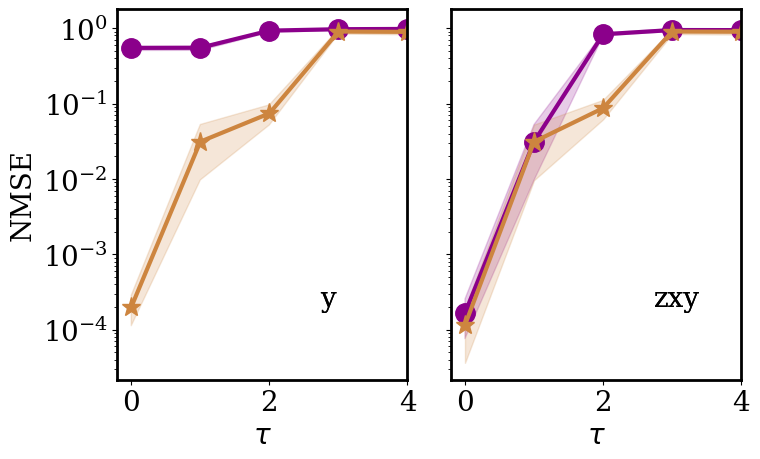

In [33]:
tm_plot_comparison(L=9, Js=1, h=3, W=0.01,
                   Nesn=45, g=0.25, l=0.001,
                   pm='NMSE', task_name='Tracerho2',
                   delay_qrc=0.5, inp_type='qubit')

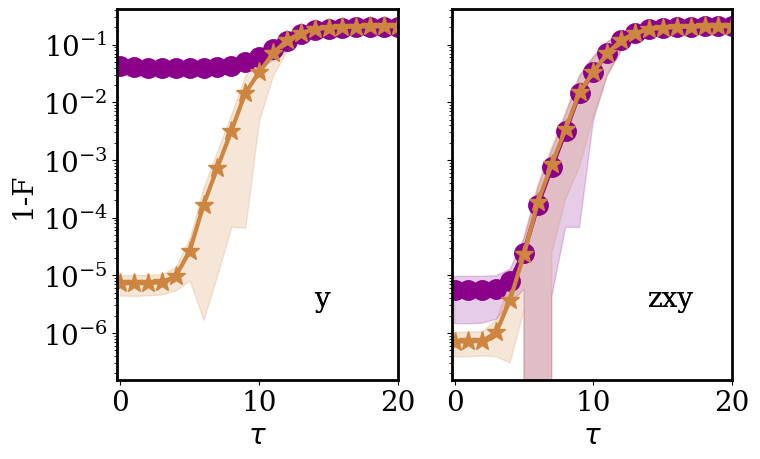

In [34]:
tm_plot_comparison(L=9, Js=1, h=3, W=0.01,
                   Nesn=45, g=4, l=0.00001,
                   pm='Fidelity', task_name='Fidelity',
                   delay_qrc=0.0, inp_type='qubit')

## Effect of tau

In [35]:
def serie_hybrid_plot(L, Js, h, W, Vmp, Dmp, ax_str, cax_str, N_esn, dt,
                      pm='NMSE', ratio_qrc_list=[0, 0.5, 1], N_rep=10, ent_inp_type='werner'):

    fig = plt.figure(figsize=(12, 4))
    spec = gridspec.GridSpec(nrows=1, ncols=2)

    ax0 = fig.add_subplot(spec[0, 0])  # Trace rho²
    ax1 = fig.add_subplot(spec[0, 1])  # Fidelity

    colors = ['black', 'hotpink', 'darkcyan']
    labels = [r'$\tau_{QRC}=0$', r'$\tau_{QRC}=\lfloor0.5\tau\rfloor$', r'$\tau_{QRC}=\tau$']

    for color, delayqrc, lab in zip(colors,ratio_qrc_list, labels):

        # --- Trace rho² ---
        path = (f'Qinp/Tracerho2/HYB/qubit/{pm}_L{L}_Js{Js}_V{Vmp}_D{Dmp}_Nrep{N_rep}_h{h}_W{W}_'
                f'dt{dt}_ax_{ax_str}_cax_{cax_str}_Nesn{N_esn}_g0.25_l0.001_delayqrc{delayqrc}_sweep_delay.npz'
                )
        data = load_data(path_to_file=path)
        delays = data['delays']
        C_mean = data['C_mean Tracerho2']
        C_std = data['C_std Tracerho2']
        ax0.plot(delays, C_mean, label=lab, marker='o', markersize=10, color=color)
        ax0.fill_between(delays, C_mean-C_std, C_mean+C_std, alpha=0.2, color=color)

        # --- Fidelity ---
        path = f'Qinp/Fidelity/HYB/qubit/Fidelity_L{L}_Js{Js}_V{Vmp}_D{Dmp}_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{ax_str}_cax_{cax_str}_Nesn{N_esn}_g4_l1e-05_delayqrc{delayqrc}_sweep_delay.npz'
        data = load_data(path_to_file=path)
        delays = data['delays']
        C_mean = data['C_mean Fidelity']
        C_std = data['C_std Fidelity']
        ax1.plot(delays, C_mean, marker='o', markersize=10, color=color)
        ax1.fill_between(delays, C_mean-C_std, C_mean+C_std, alpha=0.2, color=color)

    # # Titles and labels
    ax0.text(0.75, 0.15, r'$\mathrm{Tr}\,(\rho_1^2)$', transform=ax0.transAxes)
    ax1.text(0.65, 0.75, r'$F\,(\rho_1, \bar{\rho}_1)$', transform=ax1.transAxes)

    ax0.set_xlim(-0.25, 4)
    ax0.set_xlabel(r'$\tau$')
    ax0.set_ylabel('NMSE')
    if Vmp >1:
        ax0.set_yscale('log')
    ax1.set_xlabel(r'$\tau$')
    ax1.set_ylabel('F')

    fig.legend(loc='lower center', ncol=3, frameon=False)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.38)

    plt.savefig(f'results/plots/effect_of_tau_V{Vmp}.png', dpi=600)

    plt.show()
    return



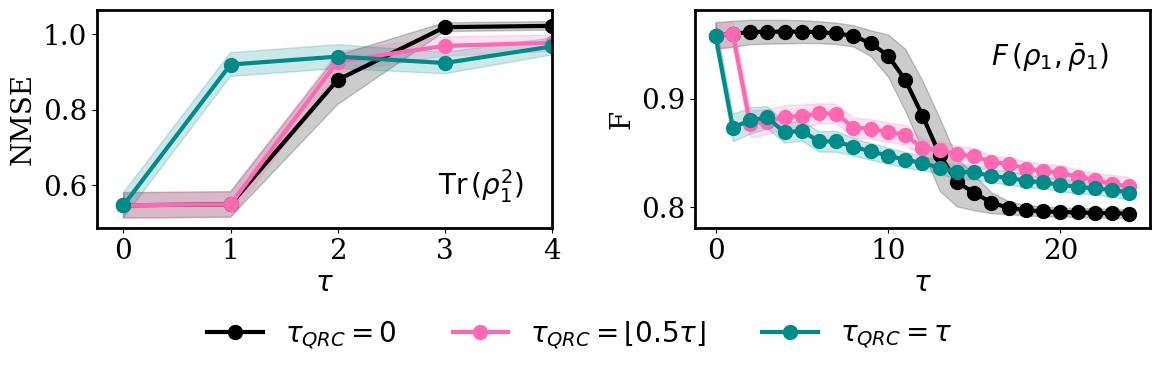

In [36]:
serie_hybrid_plot(
    L=9, Js=1, h=3, W=0.01, Vmp=1, Dmp=1, ax_str='y', cax_str='y', dt = 0.5,
    N_esn=45, pm='NMSE', ratio_qrc_list=[0.0, 0.5, 1.0], N_rep=1, ent_inp_type='x_state'
)

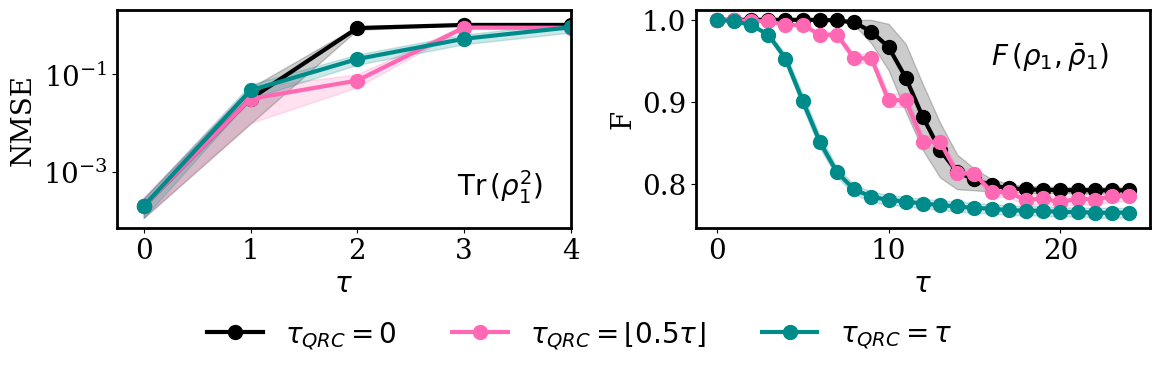

In [37]:
serie_hybrid_plot(
    L=9, Js=1, h=3, W=0.01, Vmp=10, Dmp=1, ax_str='y', cax_str='y', dt=5,
    N_esn=45, pm='NMSE', ratio_qrc_list=[0.0, 0.5, 1.0], N_rep=1, ent_inp_type='x_state'
)

## Effect of reservoir size

#### Purity

In [38]:
def plot_reservoir_size(
    L_list, L_list2, N_esn_list,
    pm, Js, Vmp, Vmp2, Dmp, N_rep, h, W,
    ax_str, ax_str2, cax_str, cax_str2, g, l, tau,
    task_name, dt, dt2,
    save_path=None, inp_type='qubit',
    delayqrc=0.5, delayqrc1=0.5,
):
    """
    Two-row plot:
      Row 1: results with (L_list, Vmp, dt, ax_str, cax_str)
      Row 2: results with (L_list2, Vmp2, dt2, ax_str2, cax_str2)
    """

    fig, axes = plt.subplots(
        2, len(tau)+1,
        figsize=(5 * (len(tau)+1), 10),  # 2 rows
        constrained_layout=True,
    )

    colors1 = ['orangered', 'seagreen', 'k']
    shape = ['s', 'o', '*']
    linestyles = ['-', '--', '-']
    
    if len(tau) == 1:
        axes = axes.reshape(2, 1)  # force 2D

    # helper to avoid repeating code
    def plot_row(ax_row, L_vals, Vmp_val, delayqrc, dt_val, ax_val, cax_val, row_idx, cmap, leg=False, x_lim=None):
        p=0
        tau_lab = fr'$\tau_{{QRC}} = \lfloor{delayqrc}\tau\rfloor$' if delayqrc == 0.5 else r'$\tau_{QRC}=0$'
        x_pos = 0.55 if delayqrc == 0.5 else 0.05
        y_pos = 0.2 if delayqrc == 0.5 else 0.8
        ax_row[-1].text(x_pos, y_pos, tau_lab, transform=ax_row[-1].transAxes)
        for col, t in enumerate(tau):
            s = 0
            ax = ax_row[col]
            C = np.full((len(L_vals), len(N_esn_list)), np.nan)

            for i, L in enumerate(L_vals):
                for j, N_esn in enumerate(N_esn_list):
                    path = (
                        f'Qinp/{task_name}/HYB/{inp_type}/{pm}_L{L}_Js{Js}_V{Vmp_val}_D{Dmp}_'
                        f'Nrep{N_rep}_h{h}_W{W}_dt{dt_val}_ax_{ax_val}_cax_{cax_val}_'
                        f'Nesn{N_esn}_g{g}_l{l}_delayqrc{delayqrc}_sweep_delay.npz'
                    )
                    data = load_data(path)
                    C_mean = data[f'C_mean {task_name}']
                    C[i, j] = C_mean[t]

                    if (L,N_esn) in zip([3,9,9],[180,45,180]) and p == 0:
                        C_std = data[f'C_std {task_name}']
                        delays = data['delays']
                        if task_name == 'Fidelity':
                            C_mean = 1 - C_mean
                        if leg:
                            ax_row[-1].plot(delays, C_mean, color=colors1[s], marker=shape[s], markersize=12, linestyle=linestyles[s], label=fr'L={L}, $N_{{\mathrm{{ESN}}}}$={N_esn}')
                        else:
                            ax_row[-1].plot(delays, C_mean, color=colors1[s], marker=shape[s], markersize=12, linestyle=linestyles[s])
                        ax_row[-1].fill_between(delays, C_mean-C_std, C_mean+C_std, alpha=0.2, color=colors1[s])
                        s+=1
                    
            p += 1

            if task_name == 'Fidelity':
                C = 1 - C

            # Normalization depending on input type
            if inp_type == 'qubit':
                norm = colors.Normalize(vmin=np.nanmin(C), vmax=np.nanmax(C)) if col == 2 and task_name == 'Fidelity' and Vmp_val == 10 else colors.LogNorm(vmin=np.nanmin(C), vmax=np.nanmax(C))
            else:
                norm = colors.Normalize(vmin=np.nanmin(C), vmax=np.nanmax(C))

            im = ax.imshow(C, origin='lower', cmap=cmap, aspect='auto', norm=norm)

            ax.set_xticks(np.arange(len(N_esn_list)))
            ax.set_xticklabels(N_esn_list)

            ax.set_yticks(np.arange(len(L_vals)))
            ax.set_yticklabels(L_vals) if col == 0 else ax.set_yticklabels([])
            ax.set_xlabel(r'$N_{\mathrm{ESN}}$')

            # Titles only in top row
            if row_idx == 0:
                ax.set_title(f'$\\tau = {t}$')

            # Left-most plots get row labels
            if col == 0:
                ax.set_ylabel(f'L')

            cbar = fig.colorbar(im, ax=ax, location='bottom', shrink=0.9)
            cbar.set_label('1-F' if pm == 'Fidelity' else 'NMSE')
        
        if pm == 'NMSE':
            ax_row[-1].set_ylabel('NMSE')
            ax_row[-1].set_xlim(-0.1,4)
        elif pm == 'Fidelity':
            ax_row[-1].set_ylabel('1-F')
            if x_lim:
                ax_row[-1].set_xlim(-0.5,x_lim)

        ax_row[-1].set_yscale('log')
        ax_row[-1].set_xlabel(r'$\tau$')


    # --- First row ---
    plot_row(axes[0], L_list, Vmp, delayqrc, dt, ax_str, cax_str, row_idx=0, cmap = 'PuRd_r', leg=True)

    # --- Second row ---
    plot_row(axes[1], L_list2, Vmp2, delayqrc1, dt2, ax_str2, cax_str2, row_idx=1, cmap = 'PuBu_r', x_lim =14)

    fig.legend(loc=(0.75, 0.5), ncols=2, fontsize=14, borderpad=1, fancybox=True, shadow=True, edgecolor='k')

    if save_path:
        plt.savefig(f'results/plots/ESNvsQRC_{task_name}.png', dpi=600)
    else:
        plt.show()



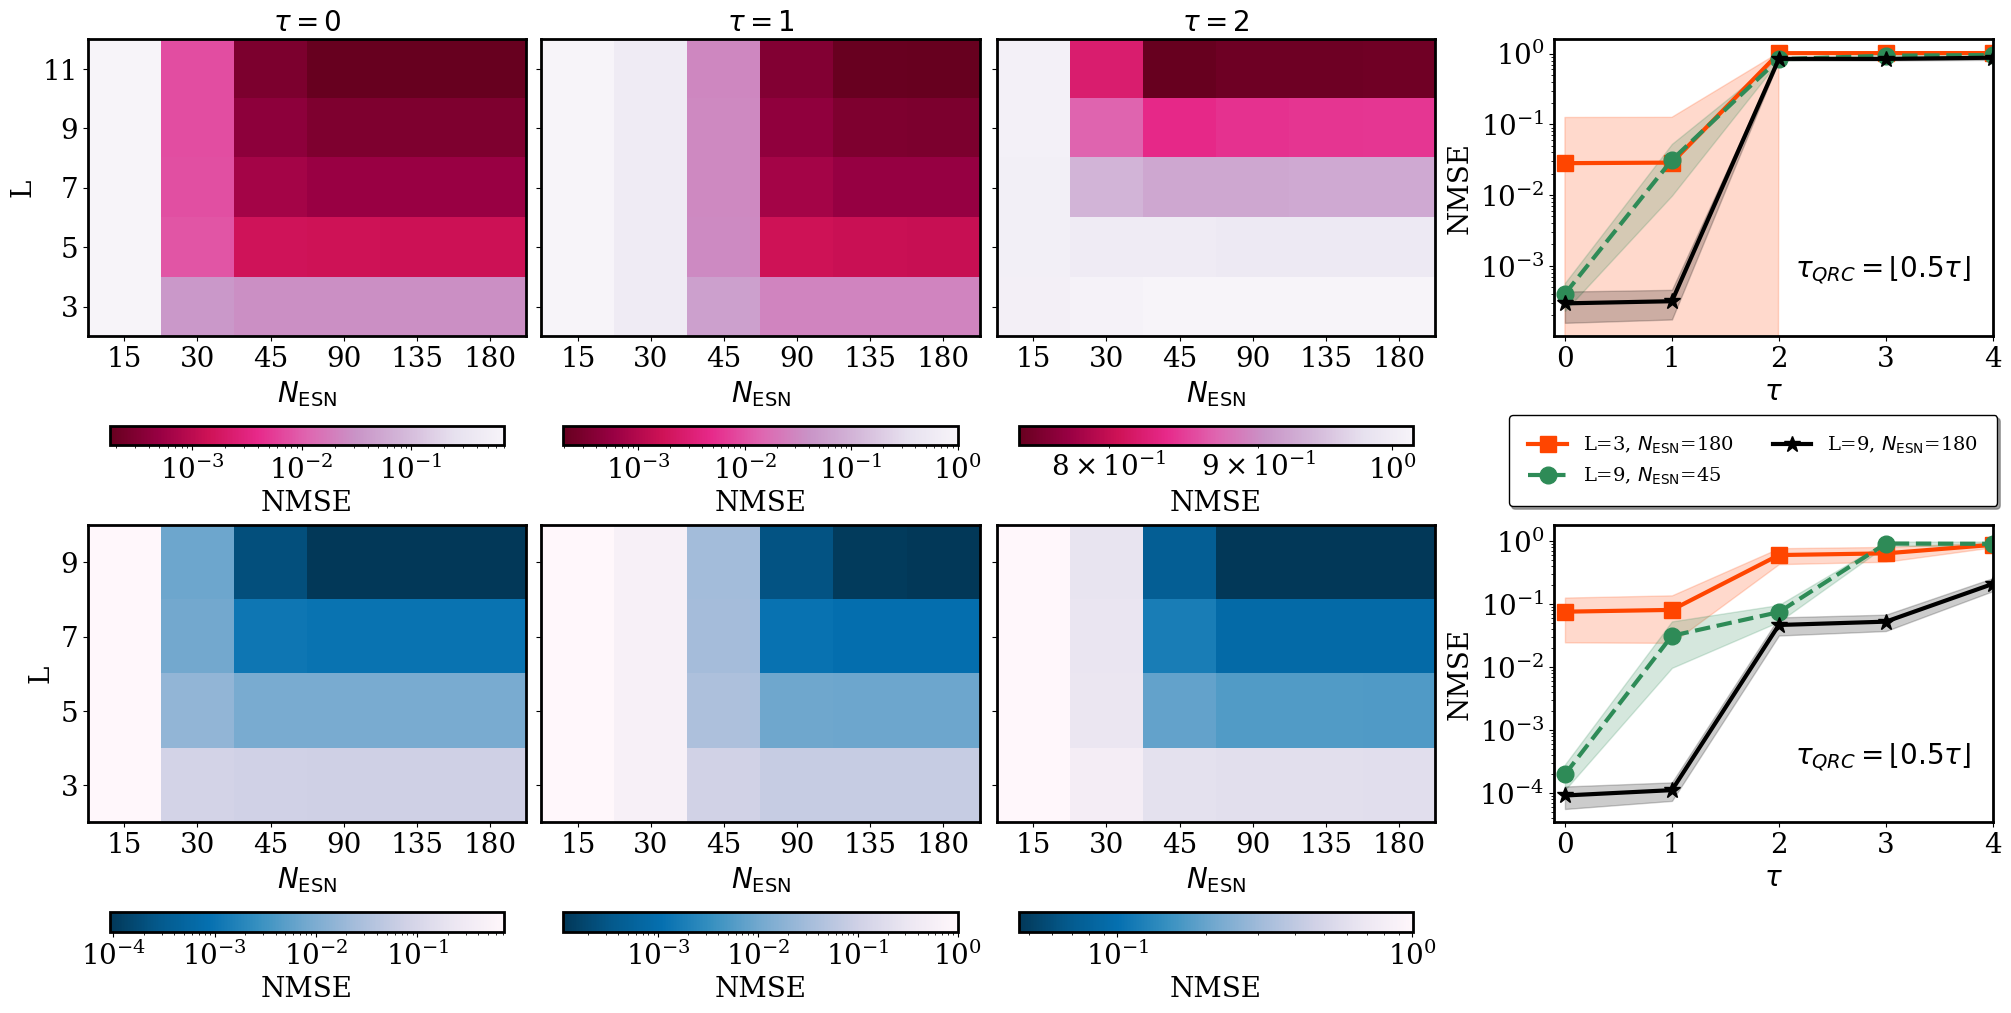

In [39]:
plot_reservoir_size(
    L_list=[3,5,7,9,11], N_esn_list=[15,30,45,90,135,180],
    L_list2=[3,5,7,9], Vmp2=10, dt2=5, ax_str2='y', cax_str2='y',
    pm='NMSE', Js=1, Vmp=1, Dmp=1, N_rep=1, h=3, W=0.01,
    ax_str='xy', cax_str='xy', g=0.25, l=0.001, tau=[0,1,2],
    task_name='Tracerho2', dt=0.5, save_path=True,
)

### Fidelity

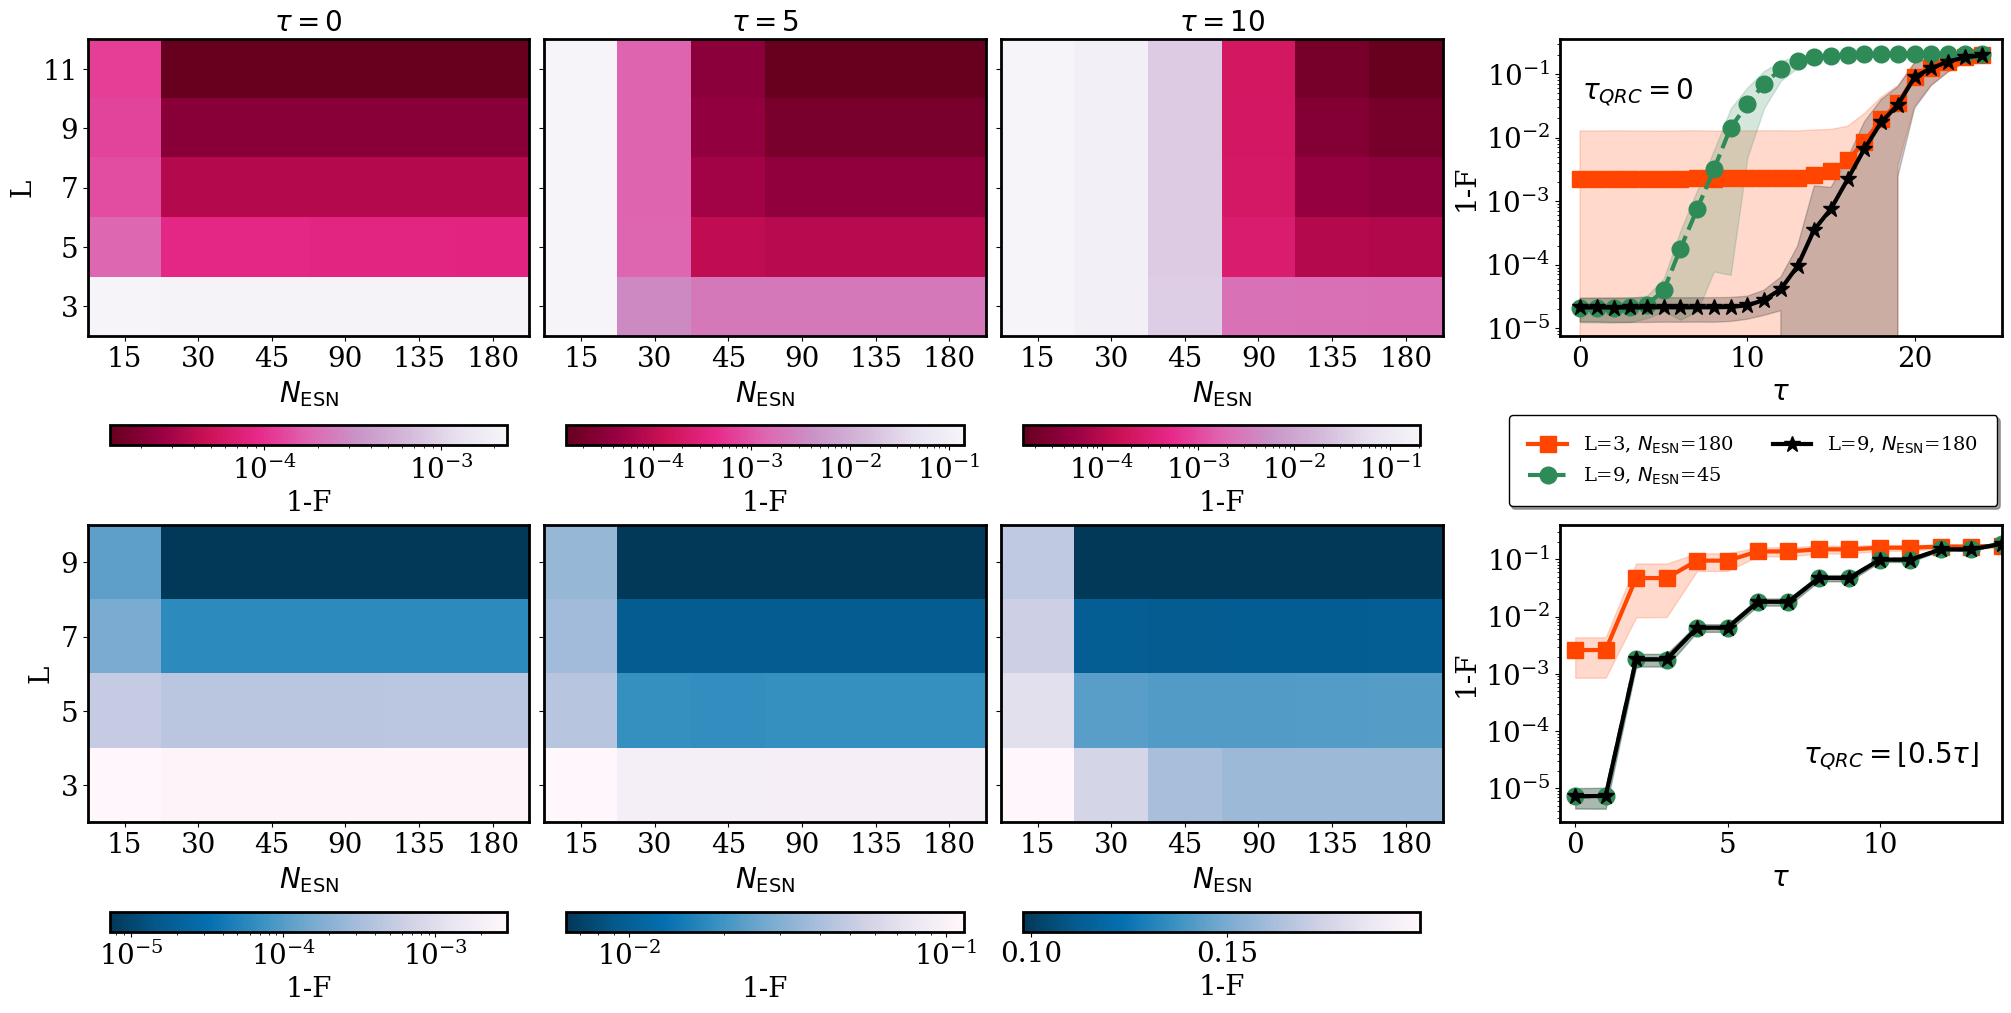

In [40]:
plot_reservoir_size(
    L_list=[3,5,7,9,11], N_esn_list=[15,30,45,90,135,180],
    L_list2=[3,5,7,9], Vmp2=10, dt2=5, ax_str2='y', cax_str2='y',
    pm='Fidelity', Js=1, Vmp=1, Dmp=1, N_rep=1, h=3, W=0.01,
    ax_str='xy', cax_str='xy', g=4, l=0.00001, tau=[0,5,10],
    task_name='Fidelity', dt=0.5, save_path=True, delayqrc=0.0, delayqrc1=0.5
)

## Scalability: 2 qubit case

In [41]:
def qubit2_input_comparison(L, N_esn, h, W, Js, Dmp=1, N_rep=1, inp_type='2qubit'):

    fig = plt.figure(figsize=(16, 8))
    G = gridspec.GridSpec(2,4, figure=fig)
    ax1 = fig.add_subplot(G[0,:2])
    ax2 = fig.add_subplot(G[0,2:], sharey=ax1)
    ax3 = fig.add_subplot(G[1,:3])
    ax4 = fig.add_subplot(G[1,3])

    ax1.set_ylabel('NMSE')
    ax1.set_yscale('log')
    ax1.set_xlabel(r'$\tau$')
    ax1.text(0.75, 0.3, r'Tr $(\rho_{1,2}^2)$', transform=ax1.transAxes)
    
    ax2.set_xlabel(r'$\tau$')
    ax2.tick_params(labelleft=False)   # hide labels
    ax2.text(0.75, 0.3, r'C $(\rho_{1,2})$', transform=ax2.transAxes)

    ax3.set_ylabel('F')
    ax3.set_xlabel(r'$\tau$')
    ax3.text(0.75, 0.7, r'F $(\rho_{1,2},\,\bar{\rho}_{1,2})$', transform=ax3.transAxes)

    ax4.set_ylabel('1-F')
    ax4.set_xlabel(r'$\tau$')
    ax4.set_xlim(-0.1, 8)
    ax4.set_yscale('log')

    def extran_perf(path, task_name):

        data = load_data(path)
        delays = data['delays']
        C_mean = data[f'C_mean {task_name}']
        C_std = data[f'C_std {task_name}']

        return delays, C_mean, C_std
    
    def plot_single(ax, vals, style, pm, task_name, lab, x_lim=None):

        color = style[0]; marker = style[1]; linestyle = style[2]
        delays = vals[0]; C_mean = vals[1]; C_std = vals[2]

        if pm == 'Infidelity':
            C_mean = 1 - C_mean

        ax.plot(delays, C_mean, color=color, marker=marker, linestyle=linestyle, markersize=0, label=lab)
        ax.fill_between(delays, C_mean-C_std, C_mean+C_std, color=color, alpha=0.3)
        # ax.errorbar(delays, C_mean, yerr=C_std, color=color, marker=marker, linestyle=linestyle, markersize=0, elinewidth=3, capsize=3,
        #             label=lab)
        if x_lim:
            ax.set_xlim(-0.1, x_lim)

        return

    def plot_all(ax, task_name, delayqrc, g, l, pm, dt1, h1, x_lim=None):
        
        if pm != 'Infidelity':

            # Hybrid V=1, y
            path = (
                            f'Qinp/{task_name}/HYB/{inp_type}/{pm}_L{L}_Js{Js}_V1_D{Dmp}_'
                            f'Nrep{N_rep}_h{h}_W{W}_dt0.5_ax_y_cax_y_'
                            f'Nesn{N_esn}_g{g}_l{l}_delayqrc{delayqrc}_sweep_delay.npz'
                        )
            vals = extran_perf(path, task_name); style = ['green', 'X', ':']
            plot_single(ax, vals, style, pm, task_name, lab='Hybrid V=1 (y-axis)', x_lim=x_lim)

            # ESN y
            path = (
                            f'Qinp/{task_name}/ESN/{inp_type}/{pm}_L{L}_Js{Js}_V10_D{Dmp}_'
                            f'Nrep{N_rep}_h{h}_W{W}_dt5_ax_y_cax_y_'
                            f'Nesn{N_esn}_g{g}_l{l}_sweep_delay.npz'
                        )
            vals = extran_perf(path, task_name); style = ['blue', 'o', '--']
            plot_single(ax, vals, style, pm, task_name, lab='ESN (y-axis)', x_lim=x_lim)

        pm_lab = 'Fidelity' if pm == 'Infidelity' else pm

        qrc_inp_type = '2qubit1' if pm == 'Fidelity' else '2qubit'

        # QRC full
        path = (
                        f'Qinp/{task_name}/QRC/{qrc_inp_type}/{pm_lab}_L{L}_Js{Js}_V1_D{Dmp}_'
                        f'Nrep{N_rep}_h{h1}_W{W}_dt{dt1}_ax_zxy_cax_zxy_'
                        f'sweep_delay.npz'
                    )
        vals = extran_perf(path, task_name); style = ['red', 's', '-']
        plot_single(ax, vals, style, pm, task_name, lab='QRC (all axes)', x_lim=x_lim)

        # Hybrid V=10, y
        path = (
                        f'Qinp/{task_name}/HYB/{inp_type}/{pm_lab}_L{L}_Js{Js}_V10_D{Dmp}_'
                        f'Nrep{N_rep}_h{h}_W{W}_dt5_ax_y_cax_y_'
                        f'Nesn{N_esn}_g{g}_l{l}_delayqrc{delayqrc}_sweep_delay.npz'
                    )
        vals = extran_perf(path, task_name); style = ['green', 'o', '-']
        plot_single(ax, vals, style, pm, task_name, lab='Hybrid V=10 (y-axis)', x_lim=x_lim)

        # ESN full
        path = (
                        f'Qinp/{task_name}/ESN/{inp_type}/{pm_lab}_L{L}_Js{Js}_V10_D{Dmp}_'
                        f'Nrep{N_rep}_h{h}_W{W}_dt5_ax_zxy_cax_zxy_'
                        f'Nesn{N_esn}_g{g}_l{l}_sweep_delay.npz'
                    )
        vals = extran_perf(path, task_name); style = ['blue', '*', '-']
        plot_single(ax, vals, style, pm, task_name, lab='ESN (all axes)', x_lim=x_lim)

        

        return
    
    plot_all(ax1, 'Tracerho2', 1.0, 0.25, 0.001, 'NMSE', dt1=100, h1=0.5, x_lim=4)
    plot_all(ax2, 'Entanglement', 1.0, 0.25, 0.001, 'NMSE', dt1=100, h1=0.5)
    plot_all(ax3, 'Fidelity', 0.0, 4, 0.00001, 'Fidelity', dt1=0.5, h1=3)
    plot_all(ax4, 'Fidelity', 0.0, 4, 0.00001, 'Infidelity', dt1=0.5, h1=3)

    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", ncol=5, fontsize=16, frameon=False)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.18)

    plt.savefig('results/plots/two_qubit_input_comparison.png', dpi=600)
    plt.show()
    return


### Purity

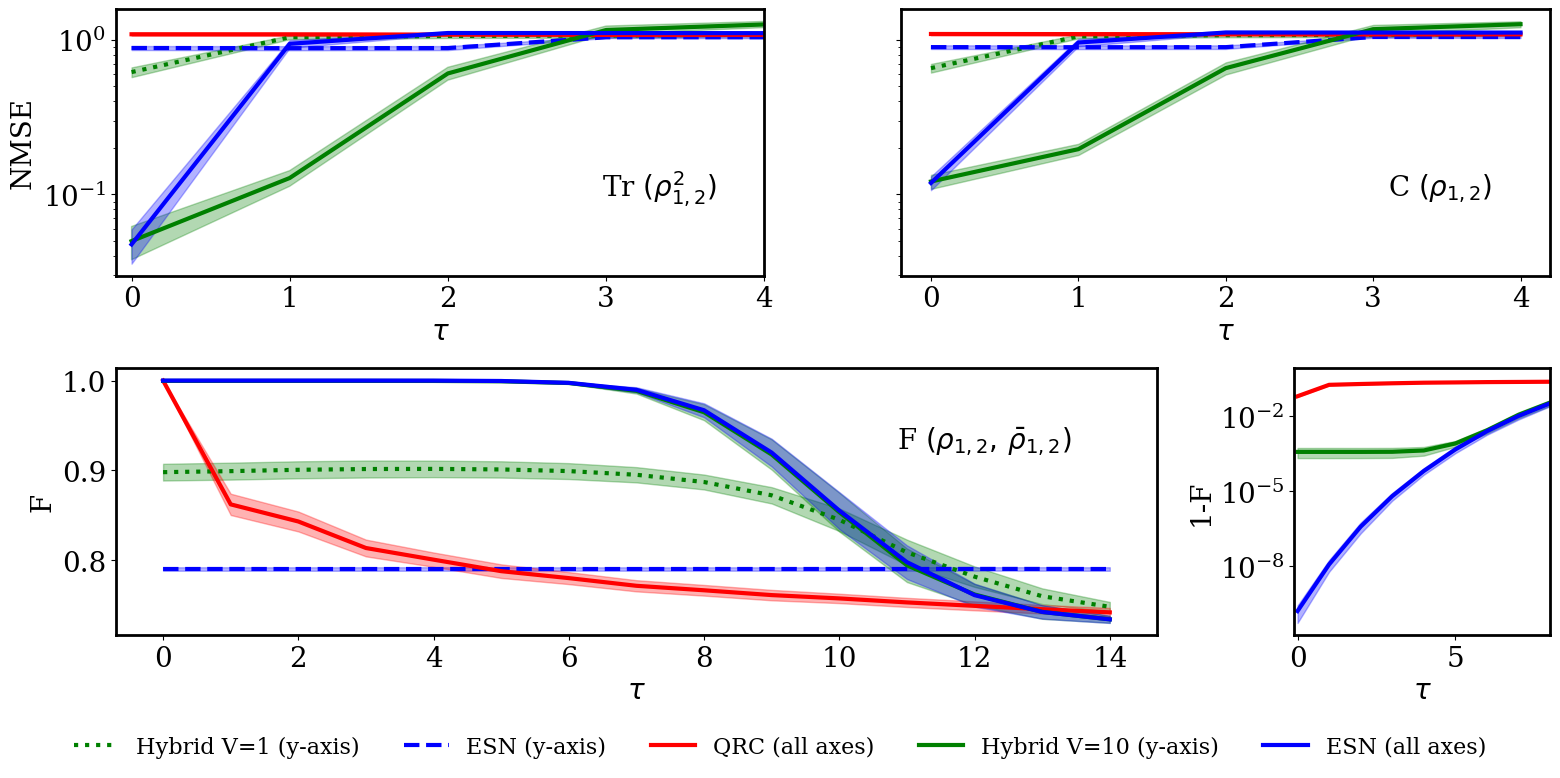

In [42]:
qubit2_input_comparison(L=9, N_esn=180, h=3, W=0.01, Js=1, Dmp=1, N_rep=1, inp_type='2qubit')

## Information Bottleneck: Purity from state reconstruction

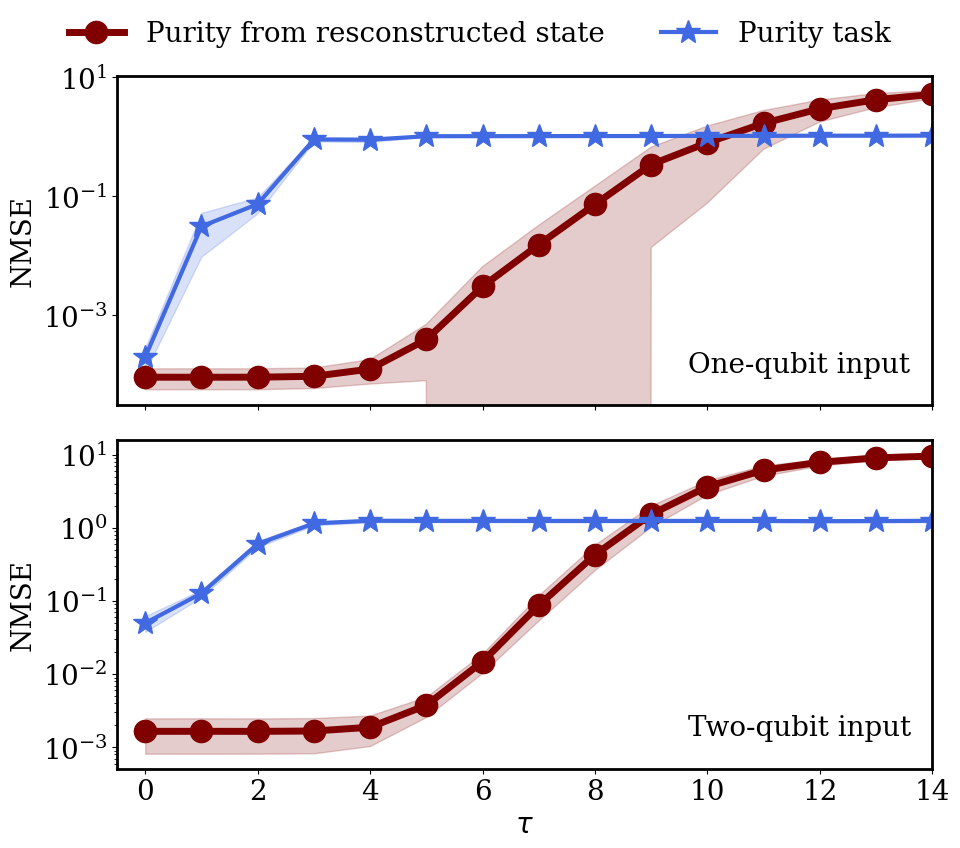

In [43]:
import matplotlib.pyplot as plt

def purity_and_fidelity_task(ax1, ax2, L, N_esn, h, W, Js, Dmp=1, N_rep=1,
                             inp_type='qubit', delayqrc=0.0, g=4, l=1e-5, 
                             delayqrc1=1.0, g1=0.25, l1=0.001, lab='One-qubit input'):

    def extran_perf(path, task_name):
        data = load_data(path)
        delays = data['delays']
        C_mean = data[f'C_mean {task_name}']
        C_std = data[f'C_std {task_name}']
        return delays, C_mean, C_std

    # First plot (NMSE)
    path1 = (
        f'Qinp/Fidelity/HYB/{inp_type}/FidelityPurity_L{L}_Js{Js}_V10_D{Dmp}_'
        f'Nrep{N_rep}_h{h}_W{W}_dt5_ax_y_cax_y_'
        f'Nesn{N_esn}_g{g}_l{l}_delayqrc{delayqrc}_sweep_delay.npz'
    )

    delays, C_mean, C_std = extran_perf(path=path1, task_name='Fidelity')

    ax1.set_ylabel('NMSE')
    ax1.plot(delays, C_mean, color='maroon', lw=5, marker='o', markersize=16, label='Purity from resconstructed state')
    ax1.fill_between(delays, C_mean-C_std, C_mean+C_std, alpha=0.2, color='maroon')
    ax1.set_yscale('log')
    ax1.set_xlim(-0.5, 14)
    ax1.text(0.7,0.1, lab, transform=ax1.transAxes)



    # Second plot (1 - Fidelity)
    path2 = (
        f'Qinp/Tracerho2/HYB/{inp_type}/NMSE_L{L}_Js{Js}_V10_D{Dmp}_'
        f'Nrep{N_rep}_h{h}_W{W}_dt5_ax_y_cax_y_'
        f'Nesn{N_esn}_g{g1}_l{l1}_delayqrc{delayqrc1}_sweep_delay.npz'
    )

    delays, C_mean, C_std = extran_perf(path=path2, task_name='Tracerho2')

    ax2.plot(delays, C_mean, color='royalblue', ls='-', marker='*', markersize=18, label='Purity task')
    ax2.fill_between(delays, C_mean-C_std, C_mean+C_std, alpha=0.2, color='royalblue')
    ax2.set_yscale('log')
    ax2.set_xlim(-0.5, 14)



# --- Main figure with 1 row, 2 columns ---
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Left panel
purity_and_fidelity_task(axes[0], axes[0],
                         L=9, N_esn=45, h=3, W=0.01, Js=1, delayqrc1=0.5)

# Right panel
purity_and_fidelity_task(axes[1], axes[1],
                         L=9, N_esn=180, h=3, W=0.01, Js=1, inp_type='2qubit', lab='Two-qubit input')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05),
           ncol=2, frameon=False)
fig.tight_layout()
axes[1].set_xlabel(r'$\tau$')
plt.savefig("results/plots/Purity_and_Fidelity_comparison.png", dpi=600,
            bbox_inches="tight")
plt.show()
